In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range


In [4]:
#Momentum Investing deals with capitalising on the current trends in the market
#financial data has a lot of noise in it, be careful while using ML
file_path="/Users/sahil/Downloads/ind_nifty500list.csv"
Stocks=pd.read_csv(file_path)
Stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027
499,Zydus Wellness Ltd.,Fast Moving Consumer Goods,ZYDUSWELL,EQ,INE768C01010


In [5]:
Stocks.sort_values(["Industry"])

,Company Name,Industry,Symbol,Series,ISIN Code
427,Suprajit Engineering Ltd.,Automobile and Auto Components,SUPRAJIT,EQ,INE399C01030
151,Exide Industries Ltd.,Automobile and Auto Components,EXIDEIND,EQ,INE302A01020
145,Endurance Technologies Ltd.,Automobile and Auto Components,ENDURANCE,EQ,INE913H01037
36,Apollo Tyres Ltd.,Automobile and Auto Components,APOLLOTYRE,EQ,INE438A01022
315,Motherson Sumi Wiring India Ltd.,Automobile and Auto Components,MSUMI,EQ,INE0FS801015
...,...,...,...,...,...
28,Alok Industries Ltd.,Textiles,ALOKINDS,BE,INE270A01029
263,K.P.R. Mill Ltd.,Textiles,KPRMILL,EQ,INE930H01031
292,Lux Industries Ltd.,Textiles,LUXIND,EQ,INE150G01020
461,Trident Ltd.,Textiles,TRIDENT,EQ,INE064C01022


In [6]:
Stocks["Symbol"]=Stocks["Symbol"]+str(".ns")
Stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE.ns,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA.ns,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB.ns,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC.ns,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG.ns,EQ,INE212H01026
...,...,...,...,...,...
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH.ns,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO.ns,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE.ns,EQ,INE010B01027
499,Zydus Wellness Ltd.,Fast Moving Consumer Goods,ZYDUSWELL.ns,EQ,INE768C01010


In [7]:
stocks_list=Stocks['Symbol'].to_list() #used to convert pandas series to a list
DataSet=yf.download(tickers=stocks_list,start="2012-1-1")

[*********************100%%**********************]  501 of 501 completed


In [8]:
DataSet.to_pickle('closingprices.pkl')
df_read=pd.read_pickle('closingprices.pkl')
pd.read_pickle('closingprices.pkl')

Price        Adj Close                                                       \
Ticker       360ONE.NS    3MINDIA.NS AARTIDRUGS.NS AARTIIND.NS     AAVAS.NS   
Date                                                                          
2012-01-02         NaN   3317.898926      7.865219    9.402603          NaN   
2012-01-03         NaN   3325.399658      8.220592    9.501580          NaN   
2012-01-04         NaN   3362.999023      8.142199    9.422399          NaN   
2012-01-05         NaN   3467.960449      8.037678    9.422399          NaN   
2012-01-06         NaN   3494.790039      8.288527    9.481785          NaN   
...                ...           ...           ...         ...          ...   
2024-04-04  721.000000  30326.500000    487.750000  691.849976  1452.150024   
2024-04-05  715.900024  30348.449219    492.649994  696.450012  1598.550049   
2024-04-08  720.099976  29990.550781    487.299988  704.799988  1626.000000   
2024-04-09  719.150024  30050.000000    513.049988  699.700012  1584.000000   
2024-04-10  735.799988  29850.900391    507.950012  736.250000  1579.500000   

Price                                                                        \
Ticker           ABB.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS       ACC.NS   
Date                                                                          
2012-01-02   504.718536   1341.109619          NaN         NaN   959.366516   
2012-01-03   514.957031   1325.982422          NaN         NaN   963.452209   
2012-01-04   517.126221   1321.869263          NaN         NaN   930.261719   
2012-01-05   515.564392   1321.092529          NaN         NaN   937.295776   
2012-01-06   505.803223   1320.772461          NaN         NaN   929.250732   
...                 ...           ...          ...         ...          ...   
2024-04-04  6501.799805  26606.400391   205.550003  237.000000  2616.250000   
2024-04-05  6669.850098  26636.900391   204.800003  237.350006  2575.100098   
2024-04-08  6699.750000  26400.400391   203.149994  239.399994  2582.449951   
2024-04-09  6529.799805  26420.500000   202.949997  237.300003  2524.300049   
2024-04-10  6641.549805  27021.800781   202.899994  238.250000  2524.699951   

Price       ...      Volume                                                    \
Ticker      ... WESTLIFE.NS WHIRLPOOL.NS    WIPRO.NS   YESBANK.NS     ZEEL.NS   
Date        ...                                                                 
2012-01-02  ...         NaN      83616.0   1708458.0   16278750.0    595675.0   
2012-01-03  ...         NaN     123819.0   5764897.0   21337225.0    831590.0   
2012-01-04  ...         NaN     102847.0   5075777.0   19977935.0    289594.0   
2012-01-05  ...         NaN       8311.0   3031457.0   16636020.0    756827.0   
2012-01-06  ...         NaN       7173.0   3327636.0   16571055.0    933489.0   
...         ...         ...          ...         ...          ...         ...   
2024-04-04  ...    120325.0     197123.0   8002023.0  266816425.0   7924622.0   
2024-04-05  ...    222658.0     155784.0   3207172.0  211846572.0   6817653.0   
2024-04-08  ...    207561.0     431505.0  13320385.0  116892324.0   7297445.0   
2024-04-09  ...     74343.0     128220.0   7900625.0  154932842.0   8403197.0   
2024-04-10  ...     91363.0     101494.0   5382801.0  112468053.0  13749902.0   

Price                                                                        
Ticker     ZENSARTECH.NS ZFCVINDIA.NS   ZOMATO.NS ZYDUSLIFE.NS ZYDUSWELL.NS  
Date                                                                         
2012-01-02       19125.0        465.0         NaN     118290.0       4608.0  
2012-01-03       38225.0        882.0         NaN     204505.0       7380.0  
2012-01-04       41045.0      28170.0         NaN     240655.0       8303.0  
2012-01-05       18015.0      31572.0         NaN      79615.0      24150.0  
2012-01-06       17610.0       4388.0         NaN     451175.0       4232.0  
...                  ...   

In [9]:
DataSet
#Dataset.dropna(axis=1) it works column wise (if a column has a single NA, it will get deleted)

Price        Adj Close                                                       \
Ticker       360ONE.NS    3MINDIA.NS AARTIDRUGS.NS AARTIIND.NS     AAVAS.NS   
Date                                                                          
2012-01-02         NaN   3317.898926      7.865219    9.402603          NaN   
2012-01-03         NaN   3325.399658      8.220592    9.501580          NaN   
2012-01-04         NaN   3362.999023      8.142199    9.422399          NaN   
2012-01-05         NaN   3467.960449      8.037678    9.422399          NaN   
2012-01-06         NaN   3494.790039      8.288527    9.481785          NaN   
...                ...           ...           ...         ...          ...   
2024-04-04  721.000000  30326.500000    487.750000  691.849976  1452.150024   
2024-04-05  715.900024  30348.449219    492.649994  696.450012  1598.550049   
2024-04-08  720.099976  29990.550781    487.299988  704.799988  1626.000000   
2024-04-09  719.150024  30050.000000    513.049988  699.700012  1584.000000   
2024-04-10  735.799988  29850.900391    507.950012  736.250000  1579.500000   

Price                                                                        \
Ticker           ABB.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS       ACC.NS   
Date                                                                          
2012-01-02   504.718536   1341.109619          NaN         NaN   959.366516   
2012-01-03   514.957031   1325.982422          NaN         NaN   963.452209   
2012-01-04   517.126221   1321.869263          NaN         NaN   930.261719   
2012-01-05   515.564392   1321.092529          NaN         NaN   937.295776   
2012-01-06   505.803223   1320.772461          NaN         NaN   929.250732   
...                 ...           ...          ...         ...          ...   
2024-04-04  6501.799805  26606.400391   205.550003  237.000000  2616.250000   
2024-04-05  6669.850098  26636.900391   204.800003  237.350006  2575.100098   
2024-04-08  6699.750000  26400.400391   203.149994  239.399994  2582.449951   
2024-04-09  6529.799805  26420.500000   202.949997  237.300003  2524.300049   
2024-04-10  6641.549805  27021.800781   202.899994  238.250000  2524.699951   

Price       ...      Volume                                                    \
Ticker      ... WESTLIFE.NS WHIRLPOOL.NS    WIPRO.NS   YESBANK.NS     ZEEL.NS   
Date        ...                                                                 
2012-01-02  ...         NaN      83616.0   1708458.0   16278750.0    595675.0   
2012-01-03  ...         NaN     123819.0   5764897.0   21337225.0    831590.0   
2012-01-04  ...         NaN     102847.0   5075777.0   19977935.0    289594.0   
2012-01-05  ...         NaN       8311.0   3031457.0   16636020.0    756827.0   
2012-01-06  ...         NaN       7173.0   3327636.0   16571055.0    933489.0   
...         ...         ...          ...         ...          ...         ...   
2024-04-04  ...    120325.0     197123.0   8002023.0  266816425.0   7924622.0   
2024-04-05  ...    222658.0     155784.0   3207172.0  211846572.0   6817653.0   
2024-04-08  ...    207561.0     431505.0  13320385.0  116892324.0   7297445.0   
2024-04-09  ...     74343.0     128220.0   7900625.0  154932842.0   8403197.0   
2024-04-10  ...     91363.0     101494.0   5382801.0  112468053.0  13749902.0   

Price                                                                        
Ticker     ZENSARTECH.NS ZFCVINDIA.NS   ZOMATO.NS ZYDUSLIFE.NS ZYDUSWELL.NS  
Date                                                                         
2012-01-02       19125.0        465.0         NaN     118290.0       4608.0  
2012-01-03       38225.0        882.0         NaN     204505.0       7380.0  
2012-01-04       41045.0      28170.0         NaN     240655.0       8303.0  
2012-01-05       18015.0      31572.0         NaN      79615.0      24150.0  
2012-01-06       17610.0       4388.0         NaN     451175.0       4232.0  
...                  ...   

In [12]:
#Benchmark=reference to compare returns

In [13]:
PercentageChange=DataSet.pct_change()
Index=PercentageChange.mean(axis=1)

In [14]:
#Nifty=Weighted average returns for top 50 stocks
#calulcation of index = weighted average of all 50 stocks

In [15]:
Index #Pandas Series

Date
2012-01-02         NaN
2012-01-03         inf
2012-01-04         inf
2012-01-05    0.087643
2012-01-06    0.117077
                ...   
2024-04-04    0.139644
2024-04-05    0.036917
2024-04-08    0.072794
2024-04-09    0.065779
2024-04-10    0.121397
Length: 3029, dtype: float64

# Momentum Investing

In [16]:
#Vanilla Momentum Investing
#Check previous year returns
#rank the stocks
#take a long position in the first 20 stocks
#Repeat the same cycle on a rolling basis

In [17]:
prevDataSet=DataSet[0:252] #taking the first 252 days and then percentage change
pyd_pct_change=prevDataSet.pct_change()

In [18]:
Ranks=np.cumprod(1+pyd_pct_change).tail(1).T
Ranks

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Date                     2013-01-04
Price     Ticker                   
Adj Close 360ONE.NS             NaN
          3MINDIA.NS       1.202779
          AARTIDRUGS.NS    3.105275
          AARTIIND.NS      2.302059
          AAVAS.NS              NaN
...                             ...
Volume    ZENSARTECH.NS    1.455425
          ZFCVINDIA.NS     2.924731
          ZOMATO.NS             NaN
          ZYDUSLIFE.NS     6.373320
          ZYDUSWELL.NS     2.451389

[3006 rows x 1 columns]

In [19]:
#download volume, multiply volume by stock price to get close to the same weight as an estimate, take monthly average

In [20]:
common_indices=DataSet.index.intersection(Index.index)
DataSet=DataSet.loc[common_indices]
Index=Index.loc[common_indices]

In [21]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-252,22):# here its -44 since its 13 month sliding window and year wise so steps of 22
    prevDataSet=DataSet[0+i:252+i]
    prevYearIndex=Index[0+i:252+i]
    Index_pct_change=np.cumprod(1+Index[0+i:252+1])-1
    Prev_Index_Return=Index_pct_change.iloc[-1]#taking the first 252 days and then percentage change
    pyd_pct_change=prevDataSet.pct_change()
    Ranks=np.cumprod(1+pyd_pct_change).tail(1).T #List of Stocks
    MomentumPicks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i] #Next Month 
    print(MomentumPicks)
    #Since we want the data of our 5 stocks of interest, we can do this
    #(np.cumprod(1+nextMonth[MomentumPicks].pct_change())-1).iloc[-1].mean()#Mean portfolio return
    #MonthlyReturn=(np.cumprod(1+nextMonth[MomentumPicks].pct_change())-1).iloc[-1].mean() #Should be a float
    monthlyIndices=nextMonth.pct_change().mean(axis=1).index
    Returns=nextMonth.pct_change().mean(axis=1).fillna(0).values
    #MonthDate=nextMonth.index[-1]
    if(Prev_Index_Return>0.05):
        lst.extend((Returns))
    else:
        lst.extend(0*Returns)
    indices.extend(monthlyIndices)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'MANAPPURAM.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'GRANULES.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'GSFC.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'GAEL.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'KANSAINER.NS'), ('Volume', 'EPL.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'GRINDWELL.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'JKCEMENT.NS'), ('Volume', 'CERA.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'BALKRISIND.NS')]
[('Volume', 'ASAHIINDIA.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'CANFINHOME.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'KANSAINER.NS'), ('Vo

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'MMTC.NS'), ('Volume', 'GUJALKALI.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'UBL.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'CERA.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'ZYDUSLIFE.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'TECHM.NS'), ('Adj Close', 'MINDACORP.NS'), ('High', 'MINDACORP.NS'), ('Open', 'MINDACORP.NS'), ('Close', 'MINDACORP.NS'), ('Low', 'MINDACORP.NS'), ('Volume', 'GODREJCP.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'FINPIPE.NS'), ('Volume', 'HCLTECH.NS')]
[('Volume', 'AIAENG.NS'), ('Volume', 'JSL.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'SUNTECK.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'CERA.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'SPARC.NS'), ('Volum

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'SPARC.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'EICHERMOT.NS'), ('Volume', 'GRANULES.NS'), ('Volume', 'BRITANNIA.NS'), ('Volume', 'EPL.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'MOTHERSON.NS'), ('Volume', 'ATUL.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'OIL.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'AJANTPHARM.NS')]
[('Volume', 'OBEROIRLTY.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'SUNDRMFAST.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'APOLLOTYRE.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'BRITANNIA.NS'), ('Volume', 'COROMANDEL.NS'), ('Volume', 'UBL.NS'), ('Volume', 'PERSISTENT.NS'), ('Volume', 'SUNTE

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'ELGIEQUIP.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'ALLCARGO.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'BAYERCROP.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'EXIDEIND.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'APOLLOHOSP.NS'), ('Volume', 'PAGEIND.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'FSL.NS'), ('Volume', 'EMAMILTD.NS'), ('Volume', 'LICHSGFIN.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'SHRIRAMFIN.NS'), ('Volume', 'SUPRAJIT.NS'), ('Close', 'MINDACORP.NS'), ('High', 'MINDACORP.NS')]
[('Volume', 'UPL.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'TORNTPHARM.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'SHREECEM.NS'), ('Volume', 'SHRIRAMFIN.NS'), ('Volume', 'ZFCVINDIA.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'YESBANK.NS'), ('V

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'APLAPOLLO.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'INDIANB.NS'), ('Volume', 'MCX.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'MARICO.NS'), ('Volume', 'SOBHA.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'PIIND.NS'), ('Volume', 'KAJARIACER.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'JSL.NS'), ('Volume', 'ALLCARGO.NS'), ('Volume', 'THERMAX.NS'), ('Volume', 'BRITANNIA.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'OIL.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'WELSPUNLIV.NS')]
[('Volume', 'MMTC.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'RELAXO.NS'), ('Volume', 'BBTC.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'COROMANDEL.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'EXIDEIND.NS'), ('Volume', 'SAN

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'PFIZER.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'PIIND.NS'), ('Volume', 'TATAELXSI.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'GPIL.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'DABUR.NS'), ('Volume', 'INGERRAND.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'BANKINDIA.NS'), ('Volume', 'NESTLEIND.NS'), ('Volume', 'ABB.NS'), ('Volume', 'PAGEIND.NS'), ('Volume', 'CANBK.NS'), ('Volume', 'OIL.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'BHEL.NS'), ('Volume', 'PEL.NS')]
[('Volume', 'TATAELXSI.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'PCBL.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'AARTIIND.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'APARINDS.NS'), ('

IndexError: single positional indexer is out-of-bounds

In [95]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-(252),22):
    prevYearDataSet = DataSet[0+i:252+i]
    prevYearIndex = Index[0+i:252+i]
    Index_pct_change = np.cumprod(1+Index[0+i:252+i]) -1
    Prev_Index_Return = Index_pct_change.iloc[-1]
    pyd_pct_change = prevYearDataSet.pct_change()
    Ranks=np.cumprod(1 + pyd_pct_change).tail(1).T
    Momentum_picks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i]
    print(Momentum_picks)
    monthlyIndices = nextMonth.pct_change().mean(axis=1).index 
    returns = nextMonth.pct_change().mean(axis=1).fillna(0).values
    if(Prev_Index_Return>0.05):
        lst.extend(returns)
    else:
        lst.extend(0*returns)
    indices.extend(monthlyIndices)

['MINDACORP.NS', 'JKLAKSHMI.NS', 'VAIBHAVGBL.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'RELAXO.NS', 'VGUARD.NS', 'ATUL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CCL.NS', 'GRANULES.NS', 'AJANTPHARM.NS', 'PRESTIGE.NS', 'CERA.NS', 'WELSPUNLIV.NS', 'CHOLAFIN.NS', 'KAJARIACER.NS', 'BRIGADE.NS', 'UBL.NS', 'RAMCOCEM.NS', 'AUROPHARMA.NS', 'BAJFINANCE.NS', 'VINATIORGA.NS', 'BAJAJFINSV.NS']
['MINDACORP.NS', 'AJANTPHARM.NS', 'VAIBHAVGBL.NS', 'JKLAKSHMI.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'VGUARD.NS', 'PRESTIGE.NS', 'CCL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'RELAXO.NS', 'ATUL.NS', 'ALKYLAMINE.NS', 'SHREECEM.NS', 'RAMCOCEM.NS', 'BERGEPAINT.NS', 'APLLTD.NS', 'CHOLAFIN.NS', 'BAJAJFINSV.NS', 'UBL.NS', 'ZEEL.NS', 'PIDILITIND.NS', 'MASTEK.NS']
['MINDACORP.NS', 'MCDOWELL-N.NS', 'AJANTPHARM.NS', 'VGUARD.NS', 'VAIBHAVGBL.NS', 'ASTRAL.NS', 'JKCEMENT.NS', 'APLLTD.NS', 'RELAXO.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'JKLAKSHMI.NS', 'ALKYLAMINE.NS', 'BERGEPAINT.NS', 'WELSPUNLIV.NS', 'CCL.NS', 'PERSISTENT.NS', 'ATUL.NS

In [22]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-(252),22):
    prevYearDataSet = DataSet[0+i:252+i]
    prevYearIndex = Index[0+i:252+i]
    Index_pct_change = np.cumprod(1+Index[0+i:252+i]) -1
    Prev_Index_Return = Index_pct_change.iloc[-1]
    pyd_pct_change = prevYearDataSet.pct_change()
    Ranks=np.cumprod(1 + pyd_pct_change).tail(1).T
    Momentum_picks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i]
    print(Momentum_picks)
    monthlyIndices = nextMonth.pct_change().mean(axis=1).index 
    returns = nextMonth.pct_change().mean(axis=1).fillna(0).values
    if(Prev_Index_Return<0): #If returns are less than 0, the hypothesis is that stock will bounce back
        #May not be a good investment strategy but maybe a long filter(?)
        lst.extend(returns)
    else:
        lst.extend(0*returns)
    indices.extend(monthlyIndices)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'MANAPPURAM.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'GRANULES.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'GSFC.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'GAEL.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'KANSAINER.NS'), ('Volume', 'EPL.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'GRINDWELL.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'JKCEMENT.NS'), ('Volume', 'CERA.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'BALKRISIND.NS')]
[('Volume', 'ASAHIINDIA.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'CANFINHOME.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'KANSAINER.NS'), ('Vo

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'MMTC.NS'), ('Volume', 'GUJALKALI.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'UBL.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'CERA.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'ZYDUSLIFE.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'TECHM.NS'), ('Adj Close', 'MINDACORP.NS'), ('High', 'MINDACORP.NS'), ('Open', 'MINDACORP.NS'), ('Close', 'MINDACORP.NS'), ('Low', 'MINDACORP.NS'), ('Volume', 'GODREJCP.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'FINPIPE.NS'), ('Volume', 'HCLTECH.NS')]
[('Volume', 'AIAENG.NS'), ('Volume', 'JSL.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'SUNTECK.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'CERA.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'SPARC.NS'), ('Volum

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'SPARC.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'EICHERMOT.NS'), ('Volume', 'GRANULES.NS'), ('Volume', 'BRITANNIA.NS'), ('Volume', 'EPL.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'MOTHERSON.NS'), ('Volume', 'ATUL.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'OIL.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'AJANTPHARM.NS')]
[('Volume', 'OBEROIRLTY.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'SUNDRMFAST.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'APOLLOTYRE.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'BRITANNIA.NS'), ('Volume', 'COROMANDEL.NS'), ('Volume', 'UBL.NS'), ('Volume', 'PERSISTENT.NS'), ('Volume', 'SUNTE

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'ELGIEQUIP.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'ALLCARGO.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'BAYERCROP.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'EXIDEIND.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'APOLLOHOSP.NS'), ('Volume', 'PAGEIND.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'FSL.NS'), ('Volume', 'EMAMILTD.NS'), ('Volume', 'LICHSGFIN.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'SHRIRAMFIN.NS'), ('Volume', 'SUPRAJIT.NS'), ('Close', 'MINDACORP.NS'), ('High', 'MINDACORP.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'UPL.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'TORNTPHARM.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'SHREECEM.NS'), ('Volume', 'SHRIRAMFIN.NS'), ('Volume', 'ZFCVINDIA.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'IPCALAB.NS'), ('Volume', 'RALLIS.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'HONAUT.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'KAJARIACER.NS')]
[('Volume', 'APLAPOLLO.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'INDIANB.NS'), ('Volume', 'MCX.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'MARICO.NS'), ('Volume', 'SOBHA.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'P

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'MMTC.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'RELAXO.NS'), ('Volume', 'BBTC.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'COROMANDEL.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'NMDC.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'EXIDEIND.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'VTL.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'JUBLPHARMA.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'ZFCVINDIA.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'ADANIPORTS.NS'), ('Volume', 'WIPRO.NS'), ('Volume', 'BANKINDIA.NS'), ('Volume', 'WELCORP.NS')]
[('Volume', 'PFIZER.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'PIIND.NS'), ('Volume', 'TATAELXSI.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'TECHM.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'GPIL.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'DABUR.NS'), ('Volume', 'INGERRAND.NS'), ('Volume', 'YESBANK.NS'),

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'TATAELXSI.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'PCBL.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'FDC.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'AARTIIND.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'TRENT.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'MCX.NS'), ('Volume', 'RELAXO.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'APOLLOHOSP.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'SRF.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'BAYERCROP.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'MOTILALOFS.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'TATAELXSI.NS'), ('Volume', 'MCX.NS'), ('Volume', 'EMAMILTD.NS'), ('Volume', 'ZYDUSWELL.NS'), ('Volume', 'GRANULES.NS'), ('Volume', 'PIDILITIND.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'HONAUT.NS'), ('Volume', 'BEL.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'MARUTI.NS'), ('Volume', 'GODREJCP.NS'), ('Volume', 'CCL.NS'), ('Volume', 'GLAXO.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'GRASIM.NS'), ('Volume', 'CANBK.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'TATAELXSI.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'JUBLPHARMA.NS'), ('Volume', 'WELSPUNLIV.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'GLAXO.NS'), ('Volume', 'MCX.NS'), ('Volume', 'BEL.NS'), ('Volume', 'ITI.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'AARTIIND.NS'), ('Volume', 'FACT.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'BALKRISIND.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'RCF.NS'), ('Volume', 'VIPIND.NS')]
[('Volume', 'NATCOPHARM.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'SRF.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'BALKRISIND.NS'), ('Volume', 'BLUESTARCO.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'CCL.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'JKPA

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Adj Close', 'VAIBHAVGBL.NS'), ('Close', 'VAIBHAVGBL.NS'), ('Open', 'VAIBHAVGBL.NS'), ('Low', 'VAIBHAVGBL.NS'), ('High', 'VAIBHAVGBL.NS'), ('Low', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Adj Close', 'CEATLTD.NS'), ('High', 'CEATLTD.NS'), ('Close', 'CEATLTD.NS'), ('Open', 'CEATLTD.NS'), ('Low', 'CEATLTD.NS'), ('Open', 'ASTRAL.NS'), ('Low', 'ASTRAL.NS'), ('Adj Close', 'ASTRAL.NS'), ('Close', 'ASTRAL.NS'), ('High', 'ASTRAL.NS'), ('High', 'CIEINDIA.NS'), ('Low', 'AUROPHARMA.NS'), ('Open', 'AUROPHARMA.NS'), ('Open', 'CIEINDIA.NS'), ('Close', 'CIEINDIA.NS')]
[('Open', 'VAIBHAVGBL.NS'), ('High', 'VAIBHAVGBL.NS'), ('Open', 'AVANTIFEED.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('Low', 'VAIBHAVGBL.NS'), ('Adj Close', 'VAIBHAVGBL.NS'), ('Close', 'VAIBHAVGBL.NS'), ('Close', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Adj Close', 'BEML.NS'), ('Adj Close', 'CEATLTD.NS'), ('Close',

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('High', 'CEATLTD.NS'), ('Adj Close', 'CEATLTD.NS'), ('Open', 'CEATLTD.NS'), ('Close', 'CEATLTD.NS'), ('Low', 'CEATLTD.NS'), ('Open', 'GRANULES.NS'), ('Low', 'GRANULES.NS'), ('Adj Close', 'GRANULES.NS'), ('Close', 'GRANULES.NS'), ('High', 'VAIBHAVGBL.NS'), ('Close', 'VAIBHAVGBL.NS'), ('Adj Close', 'VAIBHAVGBL.NS'), ('Open', 'VAIBHAVGBL.NS'), ('Low', 'VAIBHAVGBL.NS'), ('Open', 'TVSMOTOR.NS'), ('Low', 'TVSMOTOR.NS'), ('Open', 'BEML.NS'), ('High', 'TVSMOTOR.NS'), ('Adj Close', 'TVSMOTOR.NS'), ('High', 'GRANULES.NS')]
[('High', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'AVANTIFEED.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Adj Close', 'TVSMOTOR.NS'), ('Close', 'TVSMOTOR.NS'), ('High', 'TVSMOTOR.NS'), ('Low', 'TVSMOTOR.NS'), ('Open', 'TVS

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Open', 'CEATLTD.NS'), ('High', 'CEATLTD.NS'), ('Low', 'CEATLTD.NS'), ('Open', 'TVSMOTOR.NS'), ('Adj Close', 'CEATLTD.NS'), ('Close', 'CEATLTD.NS'), ('Adj Close', 'TVSMOTOR.NS'), ('Low', 'TVSMOTOR.NS'), ('High', 'TVSMOTOR.NS'), ('Close', 'TVSMOTOR.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('High', 'ALKYLAMINE.NS'), ('Adj Close', 'ALKYLAMINE.NS'), ('Close', 'ALKYLAMINE.NS'), ('High', 'TANLA.NS'), ('Low', 'TANLA.NS')]
[('High', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Adj Close', 'NBCC.NS'), ('High', 'NBCC.NS'), ('Close', 'NBCC.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('Open', 'NBCC.NS'), ('Close', 'AVANTIFEED.NS'), ('Low', 'NBCC.NS'), ('H

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('Open', 'NBCC.NS'), ('Adj Close', 'NBCC.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('Close', 'NBCC.NS'), ('Low', 'NBCC.NS'), ('High', 'NBCC.NS'), ('Close', 'WELSPUNLIV.NS'), ('High', 'WELSPUNLIV.NS'), ('Low', 'WELSPUNLIV.NS'), ('Adj Close', 'SYMPHONY.NS'), ('Adj Close', 'KEI.NS'), ('Adj Close', 'JKLAKSHMI.NS'), ('Adj Close', 'CCL.NS'), ('Close', 'KEI.NS'), ('Close', 'JKLAKSHMI.NS')]
[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Low', 'CENTURYPLY.NS'), ('Adj Close', 'CENTURYPLY.NS'), ('Close', 'CENTURYPLY.NS'), ('High', 'CENTURYPLY.NS'), ('O

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Open', 'CENTURYPLY.NS'), ('High', 'CENTURYPLY.NS'), ('Adj Close', 'CENTURYPLY.NS'), ('Low', 'CENTURYPLY.NS'), ('Close', 'CENTURYPLY.NS'), ('Adj Close', 'AVANTIFEED.NS'), ('Close', 'AVANTIFEED.NS'), ('High', 'AVANTIFEED.NS'), ('Low', 'AVANTIFEED.NS'), ('Open', 'AVANTIFEED.NS'), ('Open', 'SYMPHONY.NS'), ('Adj Close', 'SYMPHONY.NS'), ('Low', 'SYMPHONY.NS'), ('Close', 'SYMPHONY.NS'), ('High', 'SYMPHONY.NS'), ('Adj Close', 'NBCC.NS'), ('High', 'RATNAMANI.NS'), ('Low', 'NBCC.NS'), ('Close', 'NBCC.NS'), ('Open', 'RATNAMANI.NS')]
[('Adj Close', 'JBMA.NS'), ('High', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Adj Close', 'CENTURYPLY.NS'), ('Close', 'CENTURYPLY.NS'), ('High', 'CENTURYPLY.NS'), ('Low', 'CENTURYPLY.NS'), ('Open', 'CENTURYPLY.NS'), ('Adj Close', 'NBCC.NS'), ('Close', 'NBCC.NS'), ('High', 'NBCC.NS'), ('Low', 'NBCC.NS'), ('Open', 'NBCC.NS')

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Adj Close', 'CENTURYPLY.NS'), ('Close', 'CENTURYPLY.NS'), ('Low', 'CENTURYPLY.NS'), ('High', 'CENTURYPLY.NS'), ('Open', 'CENTURYPLY.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'NBCC.NS'), ('Close', 'NBCC.NS'), ('Open', 'NBCC.NS'), ('High', 'NBCC.NS'), ('Low', 'NBCC.NS'), ('Adj Close', 'KEI.NS'), ('Adj Close', 'NCC.NS'), ('Close', 'NCC.NS'), ('Close', 'KEI.NS'), ('Adj Close', 'MINDACORP.NS'), ('Low', 'NCC.NS'), ('Open', 'MINDACORP.NS'), ('Close', 'MINDACORP.NS'), ('Low', 'MINDACORP.NS'), ('High', 'KEI.NS')]


/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('High', 'JBMA.NS'), ('Open', 'JBMA.NS'), ('Adj Close', 'JBMA.NS'), ('Close', 'JBMA.NS'), ('Low', 'JBMA.NS'), ('Open', 'CENTURYPLY.NS'), ('High', 'CENTURYPLY.NS'), ('Adj Close', 'CENTURYPLY.NS'), ('Close', 'CENTURYPLY.NS'), ('Low', 'CENTURYPLY.NS'), ('High', 'KNRCON.NS'), ('Open', 'KNRCON.NS'), ('Adj Close', 'KNRCON.NS'), ('Close', 'KNRCON.NS'), ('High', 'WELSPUNLIV.NS'), ('Low', 'KNRCON.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('High', 'KPRMILL.NS'), ('High', 'MINDACORP.NS'), ('Adj Close', 'KPRMILL.NS'), ('Close', 'WELSPUNLIV.NS'), ('Adj Close', 'AEGISCHEM.NS'), ('High', 'AEGISCHEM.NS'), ('High', 'NBCC.NS'), ('Open', 'NBCC.NS')]
[('Volume', 'BCG.NS'), ('High', 'MINDACORP.NS'), ('Adj Close', 'MINDACORP.NS'), ('Open', 'MINDACORP.NS'), ('Close', 'MINDACORP.NS'), ('Low', 'MINDACORP.NS'), ('Open', 'BBTC.NS'), ('Low', 'BBTC.NS'), ('Low', 'WELSPUNLIV.NS'), ('High', 'BBTC.NS'), ('Open', 'WELSPUNLIV.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('Adj Close', 'BBTC.NS'), ('Close', 'BBTC.NS'), ('High', 'W

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'BCG.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('Close', 'WELSPUNLIV.NS'), ('Low', 'WELSPUNLIV.NS'), ('High', 'WELSPUNLIV.NS'), ('Open', 'WELSPUNLIV.NS'), ('Open', 'MINDACORP.NS'), ('High', 'MINDACORP.NS'), ('Low', 'MINDACORP.NS'), ('Adj Close', 'MINDACORP.NS'), ('Adj Close', 'BBTC.NS'), ('Close', 'MINDACORP.NS'), ('Adj Close', 'AEGISCHEM.NS'), ('Close', 'BBTC.NS'), ('Low', 'BBTC.NS'), ('Open', 'BBTC.NS'), ('Close', 'AEGISCHEM.NS'), ('High', 'BBTC.NS'), ('High', 'AEGISCHEM.NS'), ('Low', 'AEGISCHEM.NS'), ('Open', 'AEGISCHEM.NS'), ('High', 'NBCC.NS'), ('Open', 'NBCC.NS'), ('Adj Close', 'NBCC.NS'), ('Close', 'NBCC.NS')]
[('Volume', 'BCG.NS'), ('Volume', 'INTELLECT.NS'), ('Adj Close', 'SAREGAMA.NS'), ('Close', 'SAREGAMA.NS'), ('High', 'SAREGAMA.NS'), ('Open', 'SAREGAMA.NS'), ('Low', 'SAREGAMA.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('Low', 'WELSPUNLIV.NS'), ('Open', 'KEI.NS'), ('High', 'WELSPUNLIV.NS'), ('Close', 'WELSPUNLIV.NS'), ('Open', 'WELSPUNLIV.NS'), ('Low', 'KEI.NS'), ('Adj C

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'BCG.NS'), ('Adj Close', 'WELSPUNLIV.NS'), ('Open', 'WELSPUNLIV.NS'), ('High', 'WELSPUNLIV.NS'), ('Close', 'WELSPUNLIV.NS'), ('High', 'RAJESHEXPO.NS'), ('Open', 'RAJESHEXPO.NS'), ('Adj Close', 'RAJESHEXPO.NS'), ('Close', 'RAJESHEXPO.NS'), ('Adj Close', 'TATAELXSI.NS'), ('High', 'TATAELXSI.NS'), ('Adj Close', 'KEI.NS'), ('Low', 'WELSPUNLIV.NS'), ('Close', 'KEI.NS'), ('Close', 'TATAELXSI.NS'), ('High', 'KEI.NS'), ('Low', 'KEI.NS'), ('Open', 'KEI.NS'), ('Low', 'RAJESHEXPO.NS'), ('Open', 'TATAELXSI.NS'), ('Low', 'TATAELXSI.NS'), ('Adj Close', 'KPRMILL.NS'), ('Close', 'KPRMILL.NS'), ('High', 'KPRMILL.NS'), ('Open', 'KPRMILL.NS')]
[('Volume', 'BCG.NS'), ('Volume', 'GUJGASLTD.NS'), ('Adj Close', 'RAJESHEXPO.NS'), ('Close', 'RAJESHEXPO.NS'), ('Low', 'RAJESHEXPO.NS'), ('Open', 'RAJESHEXPO.NS'), ('High', 'RAJESHEXPO.NS'), ('Volume', 'INTELLECT.NS'), ('Adj Close', 'KEI.NS'), ('Open', 'KEI.NS'), ('Close', 'KEI.NS'), ('High', 'KEI.NS'), ('Low', 'KEI.NS'), ('Adj Close', 'TATAELXSI.NS'), 

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'BCG.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'RENUKA.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'MPHASIS.NS'), ('Volume', 'JSL.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'KANSAINER.NS'), ('Volume', 'OIL.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'GESHIP.NS'), ('Volume', 'JUBLPHARMA.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'TATAMTRDVR.NS'), ('Volume', 'ITI.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'JAMNAAUTO.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'BCG.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'MARICO.NS'), ('Volume', 'VINATIORGA.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'WELCORP.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'PIIND.NS'), ('Volume', 'NATCOPHARM.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'CUMMINSIND.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'POWERGRID.NS'), ('Volume', 'RAJESHEXPO.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'IDBI.NS'), ('Volume', 'MPHASIS.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'ALKYLAMINE.NS')]
[('Volume', 'JAMNAAUTO.NS'), ('Volume', 'BCG.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'JKPAPER.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'WELSPUNLIV.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'INDUSTOWER.NS'), ('Volume', 'COFORGE

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'AVANTIFEED.NS'), ('Volume', 'BCG.NS'), ('Volume', 'POLYPLEX.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'VINATIORGA.NS'), ('Volume', 'JUSTDIAL.NS'), ('Volume', 'WELSPUNLIV.NS'), ('Volume', 'FACT.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'NATCOPHARM.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'PIDILITIND.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'VEDL.NS'), ('Volume', 'BAJFINANCE.NS'), ('Open', 'RAJESHEXPO.NS'), ('Low', 'RAJESHEXPO.NS'), ('High', 'RAJESHEXPO.NS'), ('Adj Close', 'RAJESHEXPO.NS'), ('Close', 'RAJESHEXPO.NS')]
[('Volume', 'AVANTIFEED.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'BCG.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'NATCOPHARM.

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'BCG.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'NHPC.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'VINATIORGA.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'FEDERALBNK.NS'), ('Volume', 'UNOMINDA.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'ATUL.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'VMART.NS'), ('Volume', 'GSFC.NS'), ('Volume', 'VEDL.NS'), ('Volume', 'COFORGE.NS')]
[('Volume', 'JAMNAAUTO.NS'), ('Volume', 'ITI.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'BIRLACORPN.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'JINDALSAW.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'EIDP

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'GNFC.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'BIRLACORPN.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'BCG.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'MANAPPURAM.NS'), ('Volume', 'SOLARINDS.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'KSB.NS'), ('Volume', 'RENUKA.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'DEEPAKFERT.NS'), ('Volume', 'INTELLECT.NS')]
[('Volume', 'INDIANB.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'HEG.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'DELTACORP.NS'), ('Volume', 'BCG.NS'), ('Volume', 'MANAPPURAM.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume',

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'RHIM.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'JUBLFOOD.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'PCBL.NS'), ('Volume', 'UNOMINDA.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'BIRLACORPN.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'INDIANB.NS'), ('Volume', 'DEEPAKFERT.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'JBCHEPHARM.NS'), ('Volume', 'TRENT.NS'), ('Volume', 'GAEL.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'TRITURBINE.NS')]
[('Volume', 'BIRLACORPN.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'TRIVENI.NS'), ('Volume', 'GSFC.NS'), ('Volume', 'EIDPARRY.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'RADICO.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'ENGINERSIN.NS'),

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'CGCL.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'RHIM.NS'), ('Volume', 'BALKRISIND.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'GRASIM.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'INDHOTEL.NS'), ('Volume', 'MANAPPURAM.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'BAJAJFINSV.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'L&TFH.NS'), ('Volume', 'ENGINERSIN.NS'), ('Volume', 'PNB.NS'), ('Volume', 'CUB.NS'), ('Volume', 'GODREJCP.NS')]
[('Volume', 'CHOLAFIN.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'SUNTECK.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'AARTIIND.NS'), ('Volume', 'ABFRL.NS'), ('Volume', 'COROM

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'PHOENIXLTD.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'FACT.NS'), ('Volume', 'TRENT.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'NLCINDIA.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'TRIDENT.NS'), ('Volume', 'GPIL.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'CYIENT.NS'), ('Volume', 'RCF.NS'), ('Volume', 'CHAMBLFERT.NS'), ('Volume', 'DIVISLAB.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'INFY.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'BBTC.NS')]
[('Volume', 'PATANJALI.NS'), ('Volume', 'LALPATHLAB.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'FACT.NS'), ('Volume', 'CHOLAFIN.NS'), ('Volume', 'ESCORTS.NS'), ('Volume', 'RHIM.NS'), ('Volume', 'PRS

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'FSL.NS'), ('Volume', 'VMART.NS'), ('Volume', 'DIVISLAB.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'NLCINDIA.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'JKPAPER.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'BIRLACORPN.NS'), ('Volume', 'PNCINFRA.NS'), ('Volume', 'RAYMOND.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'INDHOTEL.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'MAHLIFE.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'SUNDRMFAST.NS'), ('Volume', 'APARINDS.NS')]
[('Volume', 'FSL.NS'), ('Volume', 'VMART.NS'), ('Volume', 'ITI.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'INDIANB.NS'), ('Volume', 'VTL.NS'), ('Volume', 'BIRLACORPN.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'GUJALKALI.NS'), ('Volume', 'MOTILALOFS.NS'), ('Volume', 'VGUARD.NS'), (

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'FSL.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'HEG.NS'), ('Volume', 'DIVISLAB.NS'), ('Volume', 'ALOKINDS.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'KNRCON.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'RCF.NS'), ('Volume', 'JBCHEPHARM.NS'), ('Volume', 'PNCINFRA.NS'), ('Volume', 'DEEPAKFERT.NS'), ('Volume', 'BALKRISIND.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'WELCORP.NS'), ('Volume', 'NATCOPHARM.NS'), ('Volume', 'JSWENERGY.NS'), ('Volume', 'SOLARINDS.NS'), ('Volume', 'CCL.NS'), ('Volume', 'NLCINDIA.NS'), ('High', 'HEG.NS')]
[('Volume', 'FSL.NS'), ('Volume', 'HEG.NS'), ('Volume', 'VMART.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'ALLCARGO.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'TIMKEN.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'CY

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'FSL.NS'), ('Volume', 'HEG.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'PCBL.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'GPIL.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'SUPREMEIND.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'INGERRAND.NS'), ('Volume', 'KSB.NS'), ('Volume', 'JINDALSAW.NS'), ('Volume', 'MFSL.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'INDHOTEL.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'VMART.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'FSL.NS'), ('Volume', 'JYOTHYLAB.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'CYIENT.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'ZYDUSWELL.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'JINDALSAW.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Low', 'HEG.NS'), ('Close', 'HEG.NS'), ('Adj Close', 'HEG.NS'), ('Open', 'HEG.NS'), ('High', 'HEG.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'UBL.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'RAYMOND.NS'), ('Volume', 'QUESS.NS'), ('Volume', 'VBL.NS')]
[('Volume', 'IDBI.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'HONAUT.NS'), ('Volume', 'CANBK.NS'), ('Volume', 'COFORGE.NS'), ('Volume', 'KRBL.NS'), ('Volume', 'INDIANB.NS'), ('Adj Close', 'HEG.NS'), ('Close', 'HEG.NS'), ('Low', 'HEG.NS'), ('High', 'HEG.NS'), ('Open', 'HEG.NS'), ('Volume', 'LTIM.NS'), ('Volume', 'MAHABA

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'ABBOTINDIA.NS'), ('Volume', 'FORTIS.NS'), ('Volume', 'CHAMBLFERT.NS'), ('Volume', 'SHOPERSTOP.NS'), ('Volume', 'NATIONALUM.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Open', 'HEG.NS'), ('Low', 'HEG.NS'), ('Adj Close', 'HEG.NS'), ('Close', 'HEG.NS'), ('High', 'HEG.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'IDBI.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'BBTC.NS'), ('Volume', 'INDHOTEL.NS'), ('Volume', 'GODREJCP.NS'), ('Volume', 'GMRINFRA.NS'), ('Volume', 'GNFC.NS'), ('Volume', '3MINDIA.NS'), ('Open', 'GRAPHITE.NS'), ('Low', 'GRAPHITE.NS'), ('Adj Close', 'GRAPHITE.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'MPHASIS.NS'), ('Volume', 'HEG.NS'), ('Volume', 'TEAMLEASE.NS'), ('Volume', 'BEML.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'SYNGENE.NS'), ('Volume', 'BCG.NS'), ('Volume', 'ABBOTINDIA.NS'), ('Volume', 'INGERRAND.NS'), ('Adj Close', 'HEG.NS'), ('Close', 'HEG.NS'), ('High', 'HEG.NS'), ('Volume', 'PNB.NS'), ('Low', 'HEG.NS'), ('Open', 'HEG.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'CYIENT.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'LUXIND.NS'), ('Volume', 'PRAJIND.NS'), ('Volume', 'VTL.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'NAUKRI.NS')]
[('Volume', 'AARTIDRUGS.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'DRREDDY.NS'), ('Volume', 'AJANTPHARM.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'RCF.NS'), ('Adj Close', 'HEG.NS'), ('Open', 'HEG.NS'), ('Close', 'HEG.NS'), ('Low', 'HEG.NS'), ('High', 'HEG.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'THERMAX.NS'), ('Volume', 'VMART.NS'), ('Volume', '3MINDIA.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'IDBI.NS'), ('Volume', 'ADANIPOWER.NS'), ('Adj Close', 'HEG.NS'), ('Volume', 'SANOFI.NS'), ('Close', 'HEG.NS'), ('High', 'HEG.NS'), ('Low', 'HEG.NS'), ('Open', 'HEG.NS'), ('Volume', 'FEDERALBNK.NS'), ('Volume', 'BATAINDIA.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'AJANTPHARM.NS'), ('Volume', 'DRREDDY.NS'), ('Volume', 'BORORENEW.NS'), ('Volume', 'ICICIPRULI.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'LALPATHLAB.NS'), ('Volume', 'ASHOKLEY.NS'), ('Volume', 'TATAMTRDVR.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'NCC.NS')]
[('Volume', 'INDHOTEL.NS'), ('Volume', 'LTTS.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'UBL.NS'), ('Volume', 'PRSMJOHNSN.NS'), ('Volume', 'MPHASIS.NS'), ('Volume', 'LALPATHLAB.NS'), ('Volume', 'BALKRISIND.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'LTIM.NS'), ('Adj Close', 'HEG.NS'), ('Volume', 'ZYDUSLIFE.NS'), ('Lo

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'LTIM.NS'), ('Volume', 'BALRAMCHIN.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Volume', 'GPIL.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'BORORENEW.NS'), ('Volume', 'BSE.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'PNB.NS'), ('Volume', 'PNBHOUSING.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'LTTS.NS'), ('Volume', 'POLYPLEX.NS'), ('Volume', 'NESTLEIND.NS'), ('Volume', 'UNOMINDA.NS'), ('Volume', 'PFIZER.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'CANFINHOME.NS'), ('Volume', 'ULTRACEMCO.NS'), ('Volume', 'TATASTEEL.NS'), ('Volume', 'PFC.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'NTPC.NS'), ('Volume', 'MPHASIS.NS'), ('Volume', 'KAJARIACER.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'EPL.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'HCLTECH.NS'), ('Volume', 'GAIL.NS'), ('Volume', 'NLCINDIA.NS'), ('Volume', 'MCX.NS'), ('Volume', 'PFC.NS'), ('Volume', 'SHREECEM.NS'), ('Volume', 'MARICO.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'PAGEIND.NS'), ('Volume', 'BHEL.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'VBL.NS'), ('Volume', 'ASTRAL.NS'), ('Volume', 'MUTHOOTFIN.NS'), ('Volume', 'SHRIRAMFIN.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'M&MFIN.NS'), ('Volume', 'HDFCBANK.NS')]
[('Volume', 'ABB.NS'), ('Volume', 'ATUL.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'PEL.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'ZEEL.NS'), ('Volume', 'LTTS.NS'), ('Volume', 'RAJESHEXPO.NS'), ('Volume', 'PERSISTENT.NS'), ('Volume', 'ADANIPOWER.NS'), ('Volume', 'ZYDUSWELL.NS'), ('Volume', 'SUPREMEIND.NS'), ('Volume', 'HDFCBANK.NS'), ('Volume', 'COFORGE.NS'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'PFIZER.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'LUXIND.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'BLUESTARCO.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'ALOKINDS.NS'), ('Volume', 'BEL.NS'), ('Volume', 'CONCOR.NS'), ('Volume', 'LTTS.NS'), ('Volume', 'PEL.NS'), ('Volume', 'AUBANK.NS'), ('Volume', 'TITAN.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'LALPATHLAB.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'BEML.NS'), ('Volume', 'CUB.NS'), ('Volume', 'ACC.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'MGL.NS'), ('Volume', 'DRREDDY.NS'), ('Volume', 'EPL.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'NAUKRI.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'ASTRAL.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'MPHASIS.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'BAJAJ-AUTO.NS'), ('Volume', 'AARTIIND.NS'), ('Volume', 'TATACOMM.NS'), ('Volume', 'ZEEL.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'LTTS.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'EPL.NS'), ('Volume', 'PEL.NS'), ('Volume', 'AJANTPHARM.NS'), ('Volume', 'SUPREMEIND.NS'), ('Volume', 'PRAJIND.NS'), ('Volume', 'WHIRLPOOL.NS')]
[('Volume', 'RELAXO.NS'), ('Volume', 'JYOTHYLAB.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'SUZLON.NS'), ('Volume', 'BORORENEW.NS'), ('Volume', 'ACC.NS'), ('Volume', 'EICHERMOT.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'LINDEINDIA.NS'), (

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'IBULHSGFIN.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'SYNGENE.NS'), ('Volume', 'TORNTPHARM.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'SFL.NS'), ('Volume', 'ABB.NS'), ('Volume', 'BLUESTARCO.NS'), ('Volume', 'KARURVYSYA.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'THERMAX.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'JKPAPER.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'ONGC.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'IEX.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'ALOKINDS.NS')]
[('Volume', 'CGCL.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'SRF.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'ICICIGI.NS'), ('Volume', 'LALPATHLAB.NS'), ('Volume', 'EICHERMOT.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'AARTIIND.NS'),

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'GESHIP.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'SYNGENE.NS'), ('Volume', 'PIIND.NS'), ('Volume', 'NAM-INDIA.NS'), ('Volume', 'ZEEL.NS'), ('Volume', 'QUESS.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'KANSAINER.NS'), ('Volume', 'FINPIPE.NS'), ('Volume', 'PGHH.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'THERMAX.NS'), ('Volume', 'AJANTPHARM.NS'), ('Volume', 'LTIM.NS'), ('Volume', 'JKCEMENT.NS'), ('Volume', 'TTKPRESTIG.NS'), ('Volume', 'FDC.NS'), ('Volume', 'WIPRO.NS'), ('Volume', 'NMDC.NS')]
[('Volume', 'SCHAEFFLER.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'CUMMINSIND.NS'), ('Volume', 'GSPL.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'BRIGADE.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'ZEEL.NS'), ('Volume', 'NAM-INDIA.NS'), ('Volume', 'ECLERX.NS'), 

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'NAM-INDIA.NS'), ('Volume', 'ASTRAL.NS'), ('Volume', 'IEX.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'RELAXO.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'VINATIORGA.NS'), ('Volume', 'HDFCLIFE.NS'), ('Volume', 'OBEROIRLTY.NS'), ('Volume', 'SOLARINDS.NS'), ('Volume', 'DCMSHRIRAM.NS'), ('Volume', 'AMBER.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'ISEC.NS'), ('Volume', 'HEROMOTOCO.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'SBILIFE.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'ERIS.NS'), ('Volume', 'EICHERMOT.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'JKLAKSHMI.NS')]
[('Volume', 'BCG.NS'), ('Volume', 'PNBHOUSING.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'NH.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'GICRE.NS'), ('Volume', 'AMBER.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'PEL.NS'), ('Volume', 'TIMKEN.NS'), ('Volume', 'ECLERX.NS'), ('Volume

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)


[('Volume', 'ECLERX.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'AMBER.NS'), ('Volume', 'NAUKRI.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'NAM-INDIA.NS'), ('Volume', 'ALKEM.NS'), ('Volume', 'TEJASNET.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'SYNGENE.NS'), ('Volume', 'ORIENTELEC.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'INDUSTOWER.NS'), ('Volume', 'HEG.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'YESBANK.NS'), ('Volume', 'ADANIGREEN.NS'), ('Volume', 'IBULHSGFIN.NS'), ('Volume', 'ERIS.NS'), ('Volume', 'GICRE.NS'), ('Volume', 'WHIRLPOOL.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'SAFARI.NS'), ('Volume', 'GRAPHITE.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'POLYMED.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'SFL.NS'), ('Volume', 'VTL.NS'), ('Volume', 'ISEC.NS'), ('Volume', 'AMBER.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'WELCORP.NS'), ('Volume', 'FDC.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'GUJGASLTD.NS'), ('Volume', 'IOB.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'TEAMLEASE.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'ADANIGREEN.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'APLAPOLLO.NS'), ('Volume', 'CENTURYPLY.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'CHAMBLFERT.NS'), ('Volume', 'AARTIDRUGS.NS')]
[('Volume', 'DALBHARAT.NS'), ('Volume', 'CCL.NS'), ('Volume', 'NH.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'BLUESTARCO.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Volume', 'PNBHOUSING.NS'), ('Volume', 'FINEORG.NS'), ('Volume', 'PNCINFRA.NS'), ('Volume', 'CUMMINSIND.NS'), ('Volume', 'DIXON.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'AARTIIND

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'POLYMED.NS'), ('Volume', 'DIXON.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'THERMAX.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'LAXMIMACH.NS'), ('Volume', 'RELAXO.NS'), ('Volume', 'BAYERCROP.NS'), ('Volume', 'NAM-INDIA.NS'), ('Volume', 'SFL.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'BLUESTARCO.NS'), ('Volume', 'ATGL.NS'), ('Volume', 'KSB.NS'), ('Volume', 'BANDHANBNK.NS'), ('Volume', 'PNCINFRA.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'CDSL.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'LAURUSLABS.NS')]
[('Volume', 'RBLBANK.NS'), ('Volume', 'FDC.NS'), ('Volume', 'GALAXYSURF.NS'), ('Volume', 'BANDHANBNK.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'FACT.NS'), ('Volume', 'SUPREMEIND.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'SPARC.NS'), ('Volum

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'POLYMED.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'JBCHEPHARM.NS'), ('Volume', 'IDEA.NS'), ('Volume', 'VIPIND.NS'), ('Volume', 'SUNDARMFIN.NS'), ('Volume', 'BDL.NS'), ('Volume', 'BANDHANBNK.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Volume', 'VARROC.NS'), ('Volume', 'DEEPAKNTR.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'ENDURANCE.NS'), ('Volume', 'ALKEM.NS'), ('Volume', 'MOTHERSON.NS'), ('Volume', 'NAVINFLUOR.NS'), ('Volume', 'HINDUNILVR.NS'), ('Volume', 'CUMMINSIND.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'CYIENT.NS')]
[('Volume', 'BANDHANBNK.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'HONAUT.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'GESHIP.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'EID

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'SUPRAJIT.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'KSB.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'SKFINDIA.NS'), ('Volume', 'HAL.NS'), ('Volume', 'BANDHANBNK.NS'), ('Volume', 'CHALET.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'VARROC.NS'), ('Volume', 'FDC.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Volume', 'BDL.NS'), ('Volume', 'ZYDUSWELL.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'BAJFINANCE.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'IRCON.NS')]


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'CHALET.NS'), ('Volume', 'HAL.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'METROPOLIS.NS'), ('Volume', 'CARBORUNIV.NS'), ('Volume', 'CCL.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'BDL.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'IDFC.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'ZFCVINDIA.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'APLLTD.NS'), ('Volume', 'DEEPAKFERT.NS'), ('Volume', 'VARROC.NS'), ('Volume', 'FDC.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'TEAMLEASE.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'JBCHEPHARM.NS'), ('Volume', 'GNFC.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'INDHOTEL.NS')]
[('Volume', 'AMBER.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'WESTLIFE.NS'), ('Volume', 'POLYMED.NS'), ('Volume', 'HAL.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'BANDHANBNK.NS'), ('Volume', 'ALKYLAMINE.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'TEJASNET.NS'), ('Volume

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'CHALET.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'JSWENERGY.NS'), ('Volume', 'JSL.NS'), ('Volume', 'LTIM.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'WIPRO.NS'), ('Volume', 'FDC.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'HAL.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'RHIM.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'BDL.NS'), ('Volume', 'IEX.NS'), ('Volume', 'NATCOPHARM.NS'), ('Volume', 'PERSISTENT.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'BLS.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Close', 'ALOKINDS.NS'), ('Adj Close', 'ALOKINDS.NS'), ('High', 'ALOKINDS.NS')]
[('Volume', 'PATANJALI.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'ENDURANCE.NS'), ('Volume', '360ONE.NS'), ('Volume', 'PHOENIXLTD.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'TRENT.NS'), ('Volume', 'CHALET.NS'), ('Volume', 'TORNTPHARM.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'HAL.NS'), ('Volume', 'CHAMBLFERT.NS'), ('Volume', 'SUPREMEIND.NS'), ('

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'PATANJALI.NS'), ('Volume', 'WESTLIFE.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'HAL.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'LAURUSLABS.NS'), ('Volume', 'GALAXYSURF.NS'), ('Volume', 'GRINDWELL.NS'), ('Volume', 'SOBHA.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'BCG.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'AMBER.NS'), ('Volume', 'GESHIP.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'IDFC.NS'), ('Volume', 'RVNL.NS'), ('Volume', 'IEX.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'JKCEMENT.NS'), ('Volume', 'ATUL.NS'), ('Volume', 'SKFINDIA.NS')]
[('Volume', 'PATANJALI.NS'), ('Volume', 'CHALET.NS'), ('Volume', 'BCG.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'HAL.NS'), ('Volume', 'UPL.NS'), ('Volume', 'ADANIGREEN.NS'), ('Volume', 'INDIAMART.NS'), ('Volume', 'MAHABANK.NS'), ('Open', 'TANLA.NS'), ('Low', 'TANLA.NS'), ('Adj Close', 'TANLA.NS'), ('Close', 'TANLA.NS'), ('High', 'TANLA.NS'), ('Volume',

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'ALOKINDS.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'UNIONBANK.NS'), ('Volume', 'ENDURANCE.NS'), ('Volume', 'GICRE.NS'), ('Volume', 'IOB.NS'), ('Volume', 'SHARDACROP.NS'), ('Volume', 'BANKINDIA.NS'), ('Volume', 'PRESTIGE.NS'), ('Volume', 'GMMPFAUDLR.NS'), ('Volume', 'TEJASNET.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'IDBI.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'JSWENERGY.NS'), ('Volume', 'GSPL.NS'), ('Volume', 'MRPL.NS'), ('Volume', 'BCG.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'HINDPETRO.NS')]
[('Volume', 'RTNINDIA.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'ALOKINDS.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'UCOBANK.NS'), ('Open', 'TANLA.NS'), ('Adj Close', 'TANLA.NS'), ('Close', 'TANLA.NS'), ('Volume', 'KSB.NS'), ('Low', 'TANLA.NS'), ('Volume', 'IOB.NS'), ('High', 'TANLA.NS'), ('Volume', 'CHALET.NS'), ('Volume', 'ZENSARTECH.NS'

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'TTML.NS'), ('Adj Close', 'BCG.NS'), ('Low', 'BCG.NS'), ('Close', 'BCG.NS'), ('Open', 'BCG.NS'), ('High', 'BCG.NS'), ('Volume', 'WHIRLPOOL.NS'), ('Volume', 'JUSTDIAL.NS'), ('Adj Close', 'TTML.NS'), ('Close', 'TTML.NS'), ('High', 'TTML.NS'), ('Open', 'TTML.NS'), ('Low', 'TTML.NS'), ('Volume', 'CANFINHOME.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'RENUKA.NS'), ('Volume', 'GRANULES.NS'), ('Open', 'OLECTRA.NS'), ('Low', 'OLECTRA.NS'), ('Volume', 'REDINGTON.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'NETWORK18.NS'), ('High', 'OLECTRA.NS'), ('Open', 'RTNINDIA.NS')]
[('Low', 'TTML.NS'), ('Open', 'TTML.NS'), ('Close', 'TTML.NS'), ('Adj Close', 'TTML.NS'), ('High', 'TTML.NS'), ('Adj Close', 'BCG.NS'), ('Low', 'BCG.NS'), ('Close', 'BCG.NS'), ('Volume', 'REDINGTON.NS'), ('Open', 'BCG.NS'), ('High', 'BCG.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'SUNTECK.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume',

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'REDINGTON.NS'), ('Low', 'BCG.NS'), ('Adj Close', 'BCG.NS'), ('Close', 'BCG.NS'), ('Open', 'BCG.NS'), ('High', 'BCG.NS'), ('Volume', 'RENUKA.NS'), ('Volume', 'ADANIPOWER.NS'), ('Volume', 'ZYDUSWELL.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'BSE.NS'), ('Volume', 'INFIBEAM.NS'), ('Volume', 'TV18BRDCST.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Open', 'TTML.NS'), ('Close', 'TTML.NS'), ('Adj Close', 'TTML.NS'), ('Low', 'TTML.NS'), ('High', 'TTML.NS'), ('Low', 'RTNINDIA.NS'), ('Close', 'RTNINDIA.NS'), ('Adj Close', 'RTNINDIA.NS'), ('Open', 'RTNINDIA.NS')]
[('Volume', 'PATANJALI.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'INGERRAND.NS'), ('Volume', 'BSE.NS'), ('Volume', 'CENTURYPLY.NS'), ('Adj Close', 'BCG.NS'), ('Open', 'BCG.NS'), ('High', 'BCG.NS'), ('Close', 'BCG.NS'), ('Low', 'BCG.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'CREDITACC.NS'), ('Volume', 'RHIM.NS'), ('Volume', 'JKPAPER.NS'), ('Volume', 'POLYPLEX.NS'), ('Low', 'TTML.N

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'PATANJALI.NS'), ('Volume', 'NLCINDIA.NS'), ('Volume', 'MRPL.NS'), ('Volume', 'BDL.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'VARROC.NS'), ('Volume', 'MINDACORP.NS'), ('High', 'BCG.NS'), ('Adj Close', 'BCG.NS'), ('Close', 'BCG.NS'), ('Open', 'BCG.NS'), ('Low', 'BCG.NS'), ('Volume', 'GAEL.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'ANGELONE.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'BLS.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'MHRIL.NS'), ('Volume', 'CHAMBLFERT.NS'), ('Open', 'TTML.NS'), ('Low', 'TTML.NS'), ('Close', 'TTML.NS'), ('Adj Close', 'TTML.NS')]
[('Volume', 'WELCORP.NS'), ('Volume', 'BDL.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'TEAMLEASE.NS'), ('Volume', 'JKLAKSHMI.NS'), ('High', 'BCG.NS'), ('Volume', 'AMBER.NS'), ('Low', 'BCG.NS'), ('Adj Close', 'BCG.NS'), ('Close', 'BCG.NS'), ('Open', 'BCG.NS'), ('Volume', 'METROPOLIS.NS'), ('Volume', 'BLS.NS'), ('High', 'TTML.NS'), ('Open', 'TTML.NS'), ('Close', 'TTML.NS'), ('Adj Close', 

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'GLAND.NS'), ('Volume', 'TATACOMM.NS'), ('Volume', 'BCG.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'ADANIGREEN.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'KARURVYSYA.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'ABB.NS'), ('Volume', 'BLS.NS'), ('Volume', 'INDUSINDBK.NS'), ('Volume', 'KPRMILL.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'KAJARIACER.NS'), ('Volume', 'THERMAX.NS'), ('Volume', 'AAVAS.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'PERSISTENT.NS'), ('Volume', 'VBL.NS'), ('Volume', 'TANLA.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'HINDUNILVR.NS'), ('Volume', 'BORORENEW.NS')]
[('Volume', 'ASAHIINDIA.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'RBLBANK.NS'), ('Volume', 'DELTACORP.NS'), ('Volume', 'JYOTHYLAB.NS'), ('Volume', 'TEJASNET.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'MRPL.NS'), ('Volume', 'AFFLE.NS'), ('Volume', 'IIFL.NS'), ('Volume', 

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'WESTLIFE.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'POWERGRID.NS'), ('Volume', 'RENUKA.NS'), ('Volume', 'GLAND.NS'), ('Volume', 'POONAWALLA.NS'), ('Volume', 'SUZLON.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'ASAHIINDIA.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'BDL.NS'), ('Volume', 'NHPC.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'TATAINVEST.NS'), ('Volume', 'BCG.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'TEJASNET.NS'), ('Volume', 'TANLA.NS'), ('Volume', 'CRAFTSMAN.NS'), ('Volume', 'ANURAS.NS'), ('Volume', 'RATNAMANI.NS'), ('Volume', 'MAZDOCK.NS')]
[('Volume', 'PNBHOUSING.NS'), ('Volume', 'NH.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'ANURAS.NS'), ('Volume', 'ELGIEQUIP.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'SPARC.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'MARUTI.NS'), ('Volume', 'SBICARD.NS'), ('Volume', 'HONAUT.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volu

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'TIINDIA.NS'), ('Volume', 'ABB.NS'), ('Volume', 'VBL.NS'), ('Volume', 'HUDCO.NS'), ('Volume', 'IRFC.NS'), ('Volume', 'BAJAJHLDNG.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'SCHAEFFLER.NS'), ('Volume', 'TVSMOTOR.NS'), ('Volume', 'MAZDOCK.NS'), ('Volume', 'BLS.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'ZOMATO.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'PGHL.NS'), ('Volume', 'BAYERCROP.NS'), ('Volume', '360ONE.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'QUESS.NS'), ('Volume', 'EQUITASBNK.NS'), ('Volume', 'TIMKEN.NS'), ('Volume', 'JKLAKSHMI.NS')]
[('Volume', 'CRAFTSMAN.NS'), ('Volume', 'GICRE.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'SUZLON.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'BCG.NS'), ('Volume', 'IOB.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'RCF.NS'), ('Volume', 'PNBHOUSING.NS'), ('Volume', 'FACT.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'CHOLAHLDNG.NS')

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'BCG.NS'), ('Volume', 'CIEINDIA.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'AMBUJACEM.NS'), ('Volume', 'MAZDOCK.NS'), ('Volume', 'ACC.NS'), ('Volume', 'HDFCLIFE.NS'), ('Volume', 'ADANIGREEN.NS'), ('Volume', 'TTKPRESTIG.NS'), ('Volume', 'EQUITASBNK.NS'), ('Volume', 'WESTLIFE.NS'), ('Volume', 'STARHEALTH.NS'), ('Volume', 'IRFC.NS'), ('Volume', 'SBILIFE.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'ADANIPORTS.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'JKLAKSHMI.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'CRAFTSMAN.NS'), ('Volume', 'AVANTIFEED.NS'), ('Volume', 'MFSL.NS'), ('Volume', 'TTML.NS'), ('Volume', 'BLS.NS')]
[('Volume', 'BCG.NS'), ('Volume', 'ATGL.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'EQUITASBNK.NS'), ('Volume', 'ADANIENT.NS'), ('Volume', 'TRITURBINE.NS'), ('Volume', 'LODHA.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'RVNL.NS'), ('Volume', 'PATANJALI.NS'), ('Volume', 'GODFRYPHLP.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'ANURAS.N

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'ROSSARI.NS'), ('Volume', 'BCG.NS'), ('Volume', 'TORNTPOWER.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'UTIAMC.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'BLUEDART.NS'), ('Volume', 'CHEMPLASTS.NS'), ('Volume', 'ORIENTELEC.NS'), ('Volume', 'SOBHA.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'VMART.NS'), ('Volume', 'TIINDIA.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', '360ONE.NS'), ('Volume', 'GODREJPROP.NS'), ('Volume', 'VINATIORGA.NS'), ('Volume', 'FLUOROCHEM.NS'), ('Volume', 'CREDITACC.NS'), ('Volume', 'ASTERDM.NS'), ('Volume', 'GLAND.NS'), ('Volume', 'EQUITASBNK.NS'), ('Volume', 'APARINDS.NS'), ('Volume', 'ATGL.NS')]
[('Volume', 'CERA.NS'), ('Volume', 'UJJIVANSFB.NS'), ('Volume', 'ZENSARTECH.NS'), ('Volume', 'MAXHEALTH.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'INTELLECT.NS'), ('Volume', 'RVNL.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'SANOFI.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'APARINDS.NS'), ('Volume', '

/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'SFL.NS'), ('Volume', 'TANLA.NS'), ('Volume', 'BBTC.NS'), ('Volume', 'UJJIVANSFB.NS'), ('Volume', '360ONE.NS'), ('Volume', 'IRCON.NS'), ('Volume', 'NAZARA.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'RAJESHEXPO.NS'), ('Volume', 'KEC.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'SYMPHONY.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'GLAND.NS'), ('Volume', 'MAXHEALTH.NS'), ('Volume', 'FDC.NS'), ('Volume', 'FINPIPE.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'VMART.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'PRSMJOHNSN.NS'), ('Volume', 'JYOTHYLAB.NS'), ('Volume', 'USHAMART.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'HUDCO.NS')]
[('Volume', 'SONATSOFTW.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'TEJASNET.NS'), ('Volume', 'MASTEK.NS'), ('Volume', 'BCG.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'ORIENTELEC.NS'), ('Volume', 'JMFINANCIL.NS'), ('Volume', 'MAZDOCK.NS'), ('Volume', 'WELSPUNLIV.NS'), ('Vol

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'COCHINSHIP.NS'), ('Volume', 'IOB.NS'), ('Volume', 'IRFC.NS'), ('Volume', 'INDIGO.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'OLECTRA.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'MAZDOCK.NS'), ('Volume', 'KALYANKJIL.NS'), ('Volume', 'LATENTVIEW.NS'), ('Volume', 'BANKINDIA.NS'), ('Volume', 'RVNL.NS'), ('Volume', 'JUBLPHARMA.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'SHYAMMETL.NS'), ('Volume', 'JBMA.NS'), ('Volume', 'INFIBEAM.NS'), ('Volume', 'VIPIND.NS'), ('Volume', 'HUDCO.NS'), ('Volume', 'RITES.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'OFSS.NS'), ('Volume', 'CROMPTON.NS')]
[('Volume', 'UCOBANK.NS'), ('Volume', 'IOB.NS'), ('Volume', 'FACT.NS'), ('Volume', 'RBA.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'ITI.NS'), ('Volume', 'GILLETTE.NS'), ('Volume', 'SHYAMMETL.NS'), ('Volume', 'AIAENG.NS'), ('Volume', 'GICRE.NS'), ('Volume', '360ONE.NS'), ('Volume', 'INFIBEAM.NS'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'NBCC.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'HUDCO.NS'), ('Volume', 'ITI.NS'), ('Volume', 'MINDACORP.NS'), ('Volume', 'IOB.NS'), ('Volume', 'WELSPUNLIV.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'UCOBANK.NS'), ('Volume', 'MAHABANK.NS'), ('Volume', 'FACT.NS'), ('Volume', 'ALOKINDS.NS'), ('Volume', 'CENTRALBK.NS'), ('Volume', 'TTML.NS'), ('Volume', 'IRFC.NS'), ('Volume', 'NESTLEIND.NS'), ('Volume', 'CRISIL.NS'), ('Volume', 'KNRCON.NS'), ('Volume', 'SUPREMEIND.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'LINDEINDIA.NS'), ('Volume', 'KSB.NS'), ('Volume', 'FINCABLES.NS'), ('Volume', 'IPCALAB.NS')]
[('Volume', 'EIDPARRY.NS'), ('Volume', 'TATAINVEST.NS'), ('Volume', 'NIACL.NS'), ('Volume', 'RALLIS.NS'), ('Volume', 'ECLERX.NS'), ('Volume', 'VTL.NS'), ('Volume', 'RTNINDIA.NS'), ('Volume', 'SONATSOFTW.NS'), ('Volume', 'JSWENERGY.NS'), ('Volume', 'CGPOWER.NS'), ('Volume', 'CESC.NS'), ('Volume', 'VARROC.NS'), ('Volume', 'RAJESHEXPO.NS'), ('Volume', 'SWANENERGY.

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/sr/zq2tqcl95nbbqxw4l9cwysnh0000gn/T/ipykernel_65968/3629224464.py:19: RuntimeWarning: invalid value encountered in multiply
  lst.extend(0*returns)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'CASTROLIND.NS'), ('Volume', 'BALAMINES.NS'), ('Volume', 'SHYAMMETL.NS'), ('Volume', 'MAHLIFE.NS'), ('Volume', 'APTUS.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'GUJALKALI.NS'), ('Volume', 'NETWORK18.NS'), ('Volume', 'ERIS.NS'), ('Volume', 'OIL.NS'), ('Volume', 'HINDCOPPER.NS'), ('Volume', 'ALLCARGO.NS'), ('Volume', 'BEML.NS'), ('Volume', 'ANURAS.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'JUBLPHARMA.NS'), ('Volume', 'STARHEALTH.NS'), ('Volume', 'AAVAS.NS'), ('Volume', 'AETHER.NS'), ('Volume', 'BDL.NS'), ('Volume', 'FINEORG.NS'), ('Volume', 'GLAXO.NS'), ('Volume', 'TEAMLEASE.NS'), ('Volume', 'POLYMED.NS')]
[('Volume', 'SHOPERSTOP.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'CASTROLIND.NS'), ('Volume', 'MMTC.NS'), ('Volume', 'AUBANK.NS'), ('Volume', 'CHOLAHLDNG.NS'), ('Volume', 'BORORENEW.NS'), ('Volume', 'NBCC.NS'), ('Volume', 'AARTIDRUGS.NS'), ('Volume', 'INFIBEAM.NS'), ('Volume', 'SWSOLAR.NS'), ('Volume', 'RAIN.NS'), ('Volume', 'RITES.NS'), ('Volume

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


[('Volume', 'KNRCON.NS'), ('Volume', 'VGUARD.NS'), ('Volume', 'JAMNAAUTO.NS'), ('Volume', 'SWANENERGY.NS'), ('Volume', 'EMAMILTD.NS'), ('Volume', 'HAVELLS.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'VIPIND.NS'), ('Volume', 'MRPL.NS'), ('Volume', 'ZEEL.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'HFCL.NS'), ('Volume', 'BEML.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'ERIS.NS'), ('Volume', 'SOBHA.NS'), ('Volume', 'SAREGAMA.NS'), ('Volume', 'CASTROLIND.NS'), ('Volume', 'EIHOTEL.NS'), ('Volume', 'HUDCO.NS'), ('Volume', 'CDSL.NS'), ('Volume', 'AEGISCHEM.NS'), ('Volume', 'RITES.NS'), ('Volume', 'NHPC.NS'), ('Volume', 'ITI.NS')]
[('Volume', 'JAMNAAUTO.NS'), ('Volume', 'CGCL.NS'), ('Volume', 'COCHINSHIP.NS'), ('Volume', 'LAXMIMACH.NS'), ('Volume', 'SJVN.NS'), ('Volume', 'JSWENERGY.NS'), ('Volume', 'INFIBEAM.NS'), ('Volume', 'GSFC.NS'), ('Volume', 'VAIBHAVGBL.NS'), ('Volume', 'SUNTECK.NS'), ('Volume', 'ITI.NS'), ('Volume', 'GRAPHITE.NS'), ('Volume', 'IIFL.NS'), ('Volume', 'GPPL.NS'), ('Volume', 'NH

In [104]:
FinalData=pd.DataFrame(lst,columns=["Returns"],index=indices)
FinalData

,Returns
2013-01-07,0.0
2013-01-08,-0.0
2013-01-09,-0.0
2013-01-10,-0.0
2013-01-11,-0.0
...,...
2024-03-14,0.0
2024-03-15,-0.0
2024-03-18,0.0
2024-03-19,-0.0


In [105]:
#FinalData.set_index("Date",inplace=True) #To Set the date as index
#FinalData

<Axes: >

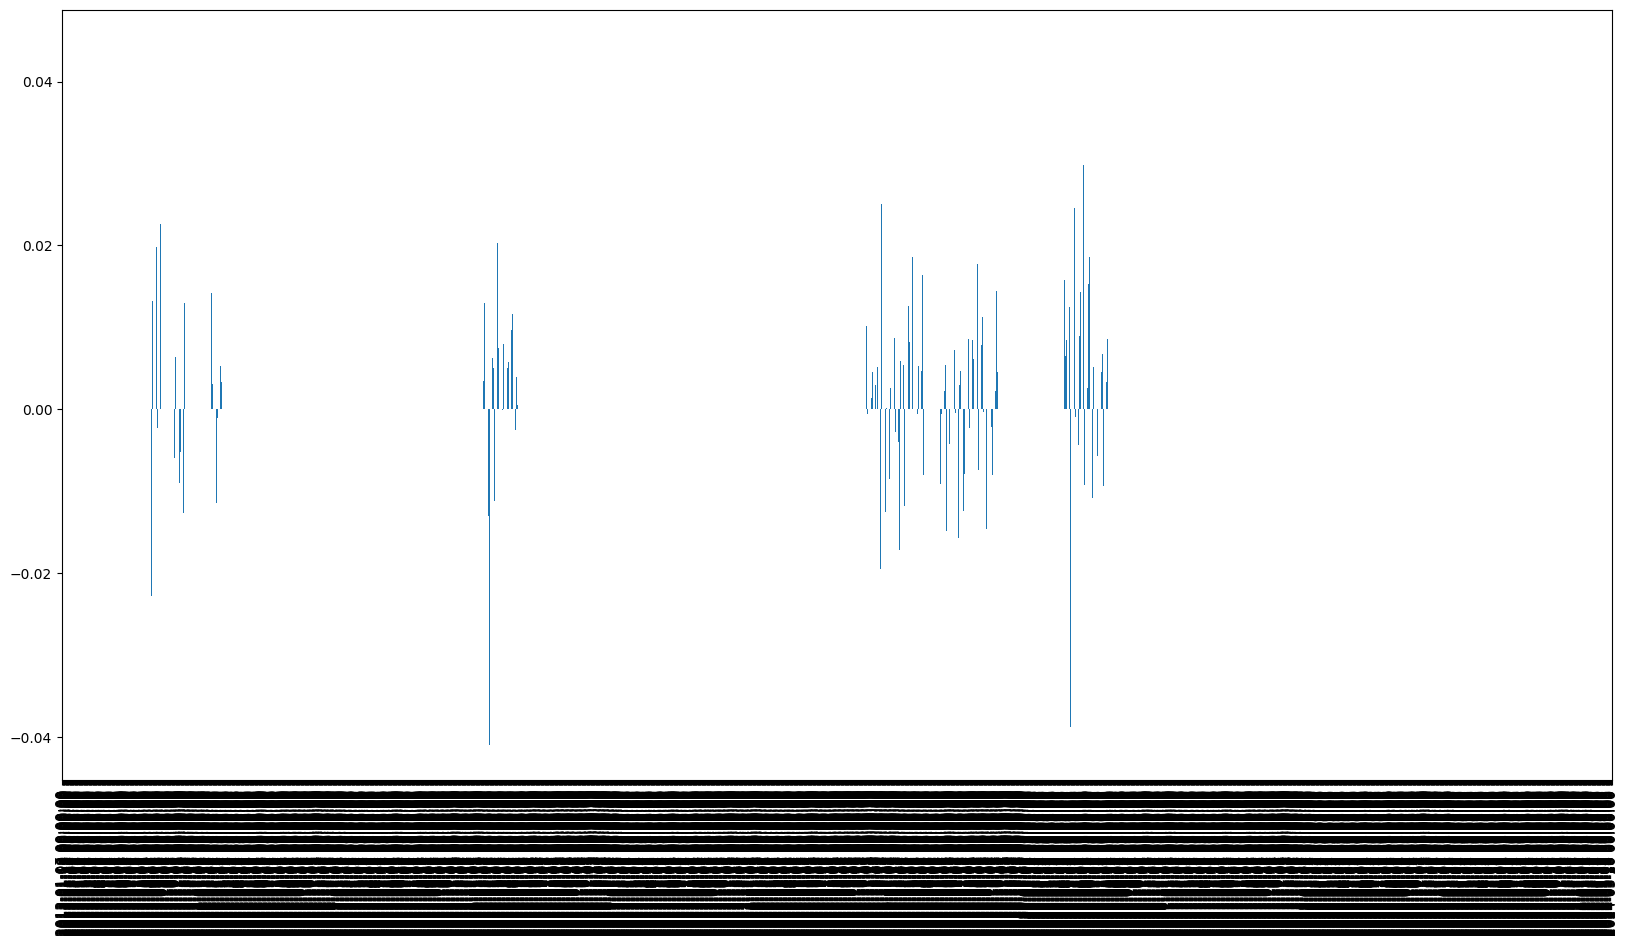

In [106]:
FinalData['Returns'].plot.bar()

In [107]:
(FinalData).std()
#Sharpe Ratio
FinalData.mean()/FinalData.std()


Returns    0.067216
dtype: float64

In [108]:
#Sharpe Ratio of Index
Index.mean()/Index.std()

0.09567442522155256

<Axes: xlabel='Date'>

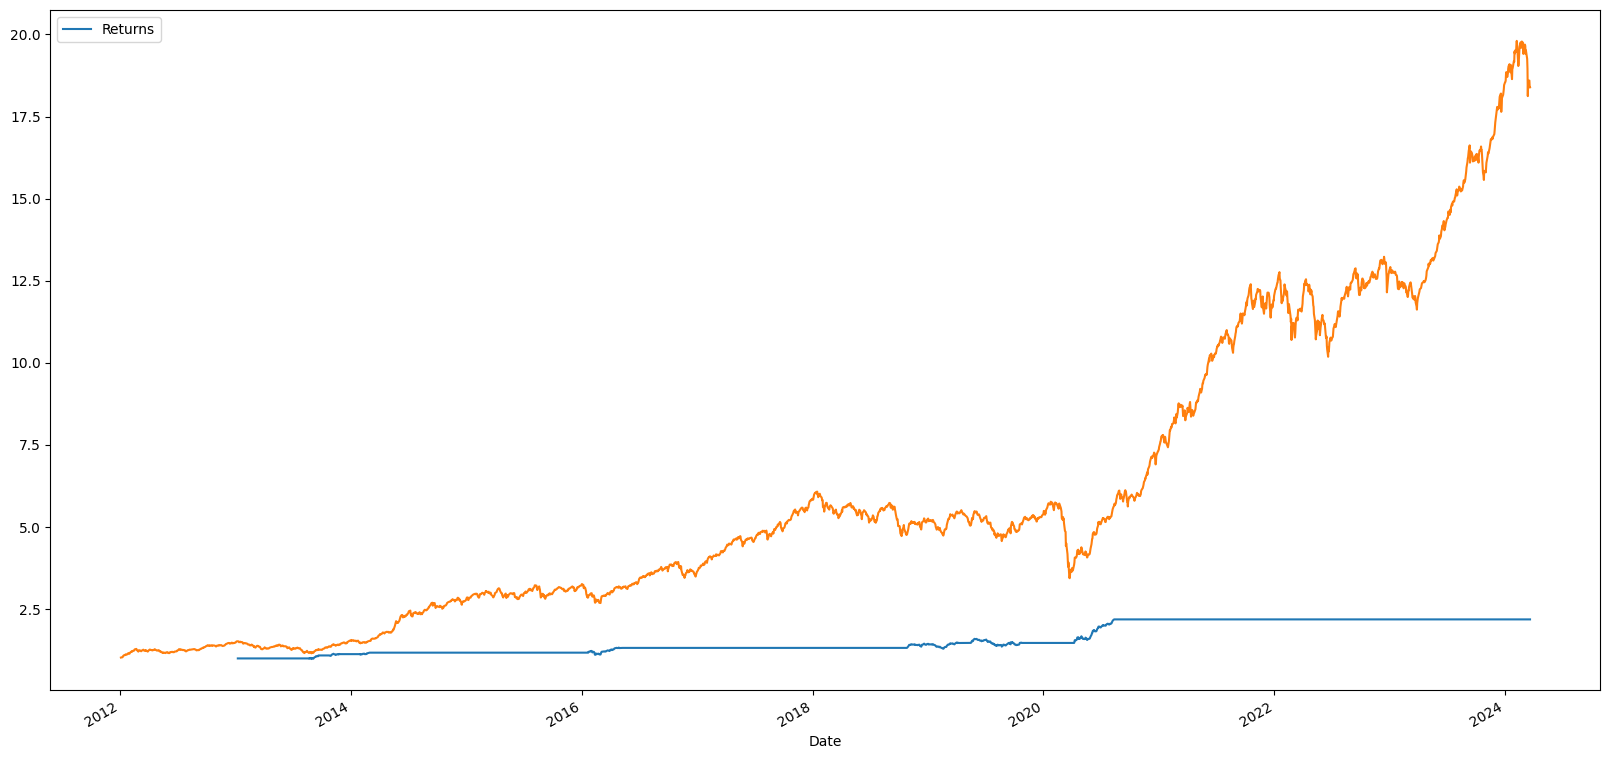

In [110]:
#Our strategy is more volatile than the standard Index but also higher returns, so volatility is worth it
np.cumprod(1+FinalData).plot()
np.cumprod(1+Index).plot()

In [102]:
#Right now the data is for monthly returns, but this misses out on volatility of daily returns

In [66]:
nextMonth.pct_change().mean(axis=1)

Date
2013-12-30         NaN
2013-12-31    0.005126
2014-01-01    0.007196
2014-01-02   -0.018271
2014-01-03    0.005794
2014-01-06    0.004655
2014-01-07   -0.001939
2014-01-08    0.004425
2014-01-09   -0.005067
2014-01-10   -0.006544
2014-01-13    0.001612
2014-01-14   -0.001291
2014-01-15    0.003746
2014-01-16   -0.001561
2014-01-17   -0.013903
2014-01-20    0.006872
2014-01-21    0.004321
2014-01-22    0.004120
2014-01-23   -0.002125
2014-01-24   -0.016499
2014-01-27   -0.025741
2014-01-28    0.002338
dtype: float64

In [67]:
FinalData2=pd.DataFrame(lst,columns=["Returns"],index=indices)

<Axes: xlabel='Date'>

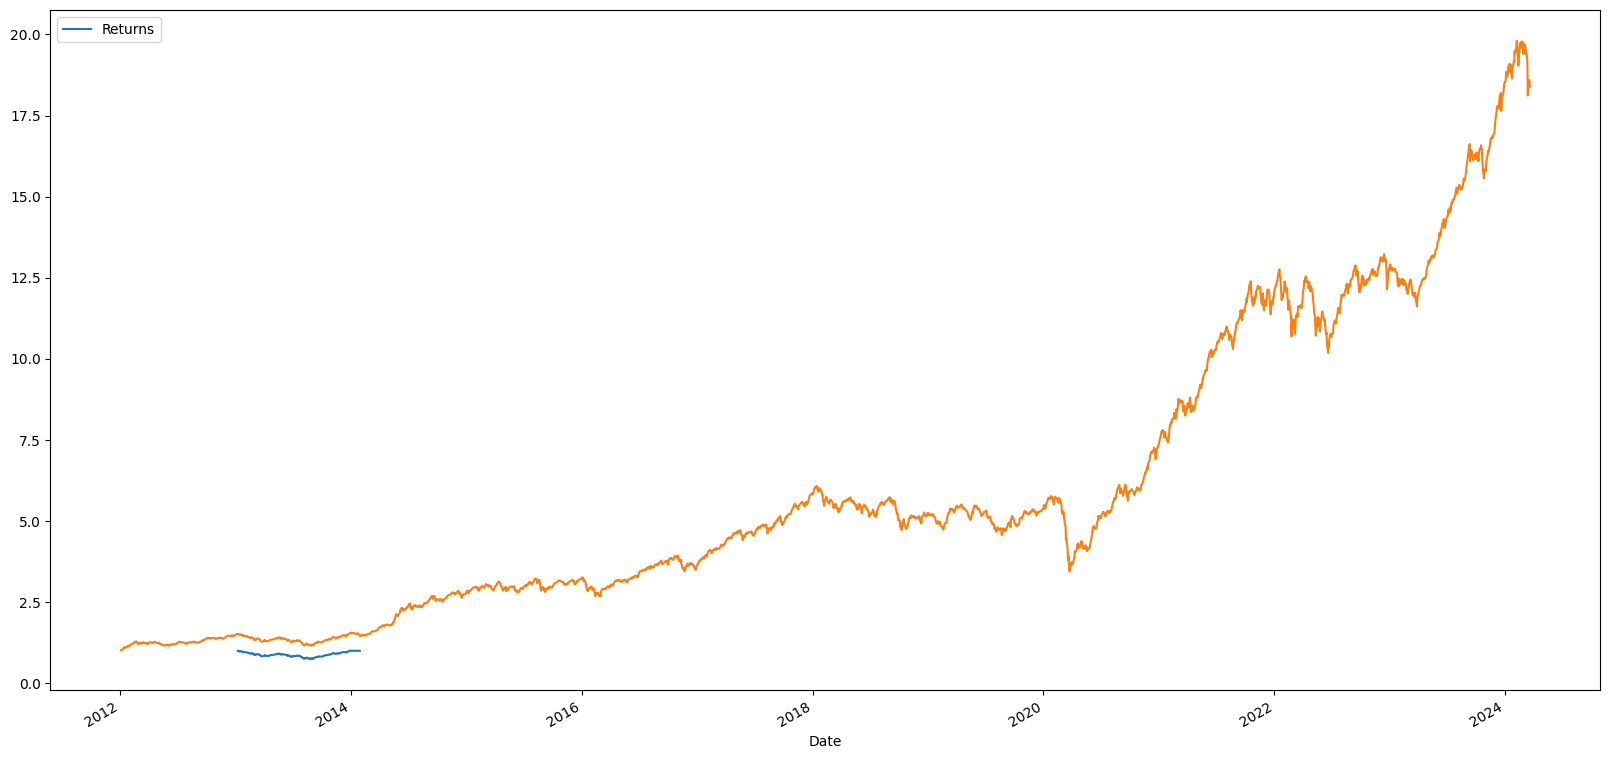

In [68]:
year=2020
np.cumprod(1+FinalData).plot()
np.cumprod(1+Index).plot()

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-08-21   2013-08-21
End Period                 2024-03-20   2024-03-20
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       17.0%

Cumulative Return          1,459.24%    118.84%
CAGR﹪                     19.62%       5.24%

Sharpe                     1.62         1.1
Prob. Sharpe Ratio         100.0%       99.98%
Smart Sharpe               1.33         0.9
Sortino                    2.17         1.78
Smart Sortino              1.78         1.47
Sortino/√2                 1.53         1.26
Smart Sortino/√2           1.26         1.04
Omega                      1.59         1.59

Max Drawdown               -43.37%      -14.9%
Longest DD Days            953          912
Volatility (ann.)          17.37%       7.12%
R^2                        0.16         0.16
Information Ratio          -0.08        -0.08
Calmar                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-05-29,2019-08-22,2020-04-16,324,-14.903230,-13.177806
2,2018-12-20,2019-02-18,2019-03-11,82,-10.690895,-10.200104
3,2016-02-02,2016-02-12,2016-03-18,46,-9.759942,-8.913897
4,2020-05-04,2020-05-18,2020-05-29,26,-6.676542,-6.548812
5,2018-11-12,2018-12-10,2018-12-18,37,-5.379705,-4.051496


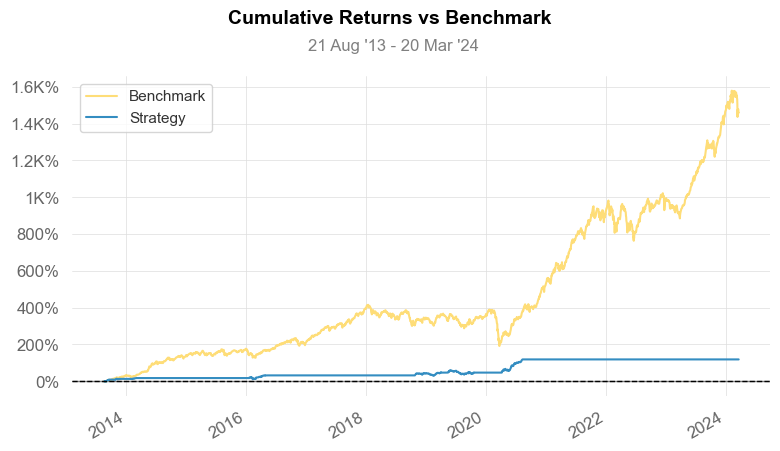

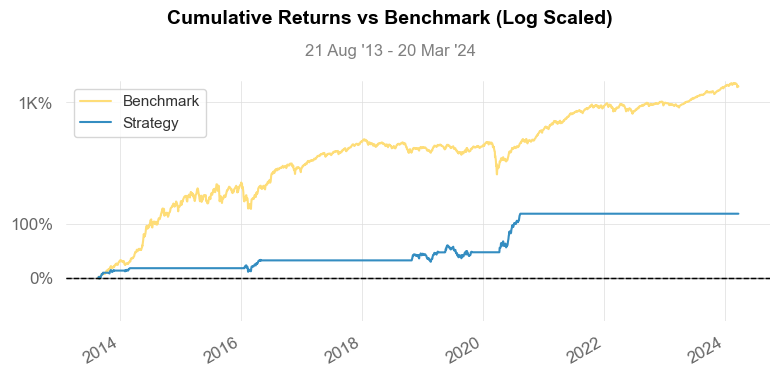

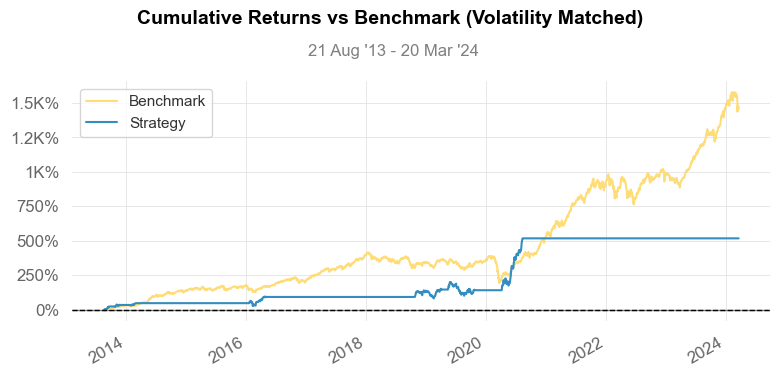

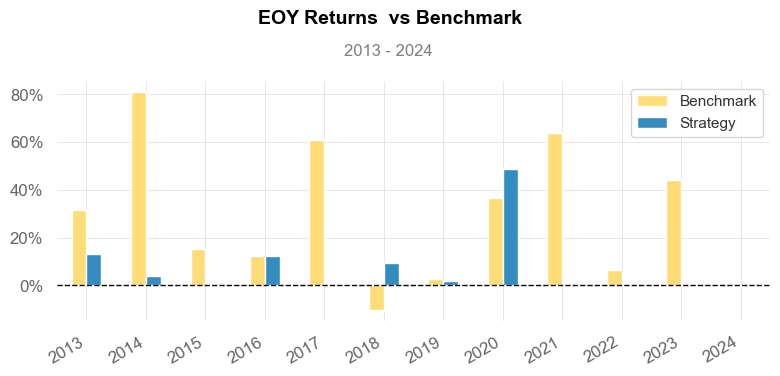

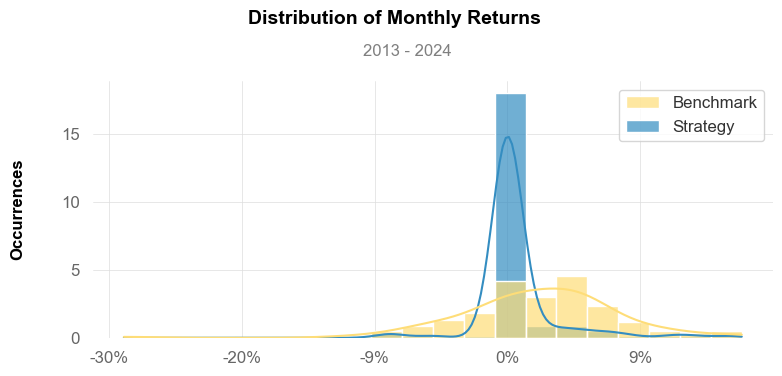

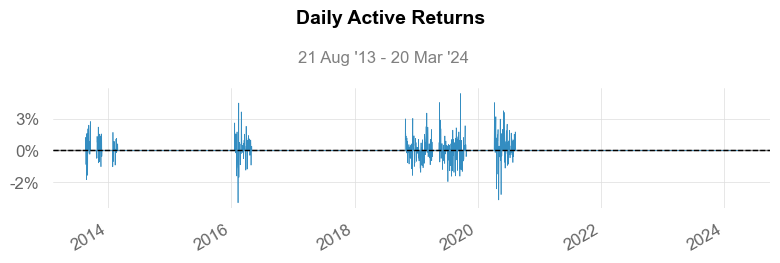

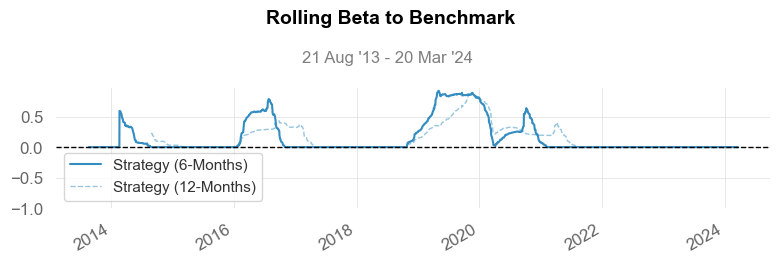

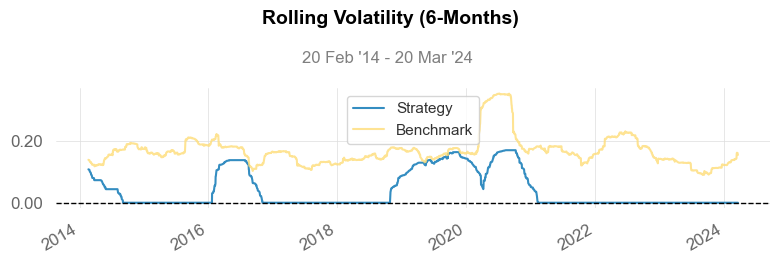

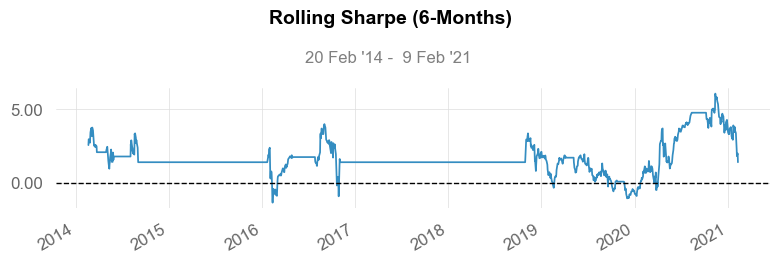

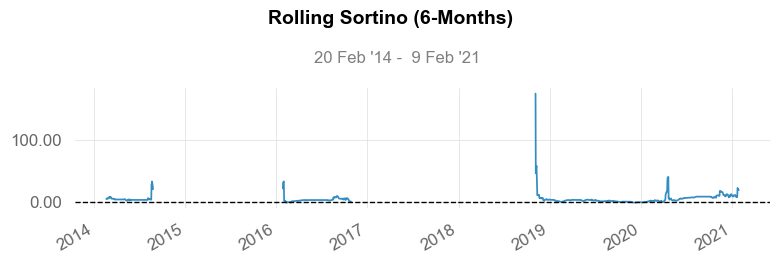

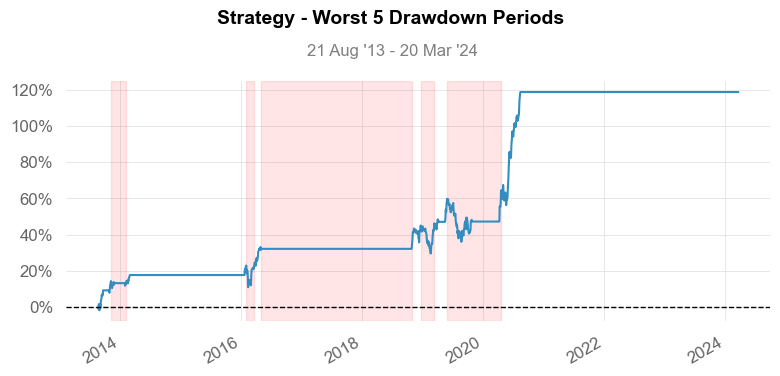

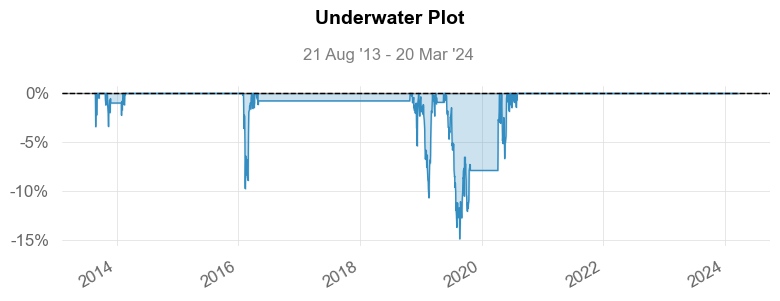

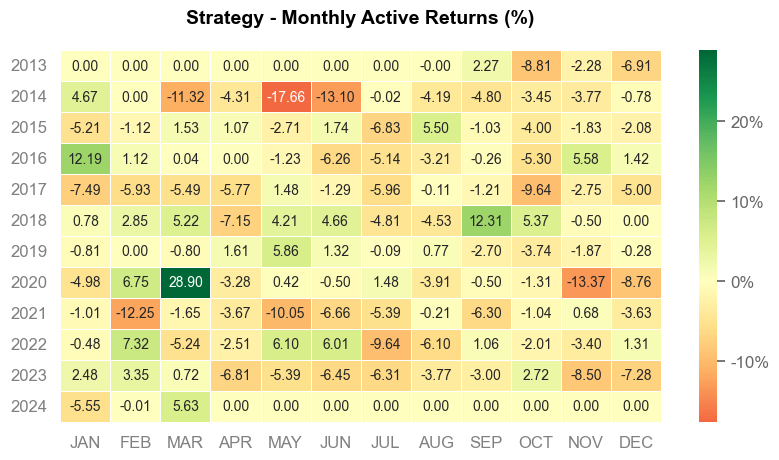

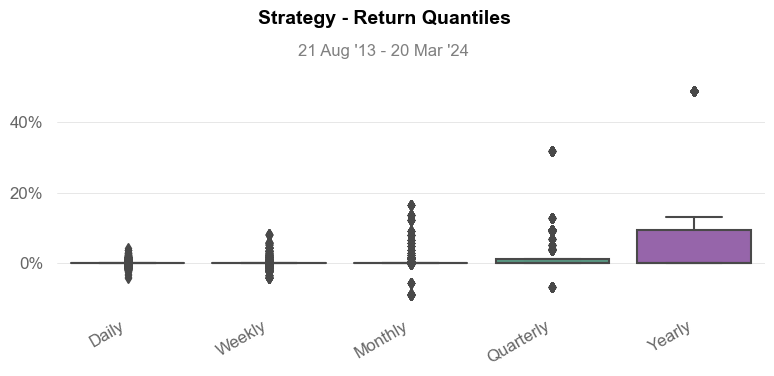

In [122]:
#drawdowns, karma ratio and applications
qs.reports.full(FinalData["Returns"],Index)


In [131]:
Stocks
Stocks[Stocks['Industry']== 'Textiles']


,Company Name,Industry,Symbol,Series,ISIN Code
28,Alok Industries Ltd.,Textiles,ALOKINDS,BE,INE270A01029
263,K.P.R. Mill Ltd.,Textiles,KPRMILL,EQ,INE930H01031
292,Lux Industries Ltd.,Textiles,LUXIND,EQ,INE150G01020
349,Page Industries Ltd.,Textiles,PAGEIND,EQ,INE761H01022
385,Raymond Ltd.,Textiles,RAYMOND,EQ,INE301A01014
461,Trident Ltd.,Textiles,TRIDENT,EQ,INE064C01022
479,Vardhman Textiles Ltd.,Textiles,VTL,EQ,INE825A01020
489,Welspun Living Ltd.,Textiles,WELSPUNLIV,EQ,INE192B01031


In [135]:
set((Stocks["Industry"]))
#to iterate through a set, convert it to a list and then iterate

{'Automobile and Auto Components',
 'Capital Goods',
 'Chemicals',
 'Construction',
 'Construction Materials',
 'Consumer Durables',
 'Consumer Services',
 'Diversified',
 'Fast Moving Consumer Goods',
 'Financial Services',
 'Forest Materials',
 'Healthcare',
 'Information Technology',
 'Media Entertainment & Publication',
 'Metals & Mining',
 'Oil Gas & Consumable Fuels',
 'Power',
 'Realty',
 'Services',
 'Telecommunication',
 'Textiles'}

In [146]:
SectoralETF = ()


In [156]:
ValidStocks=(Stocks[Stocks["Industry"] == 'Textiles']['Symbol']).to_list()
ValidStocks

['ALOKINDS',
 'KPRMILL',
 'LUXIND',
 'PAGEIND',
 'RAYMOND',
 'TRIDENT',
 'VTL',
 'WELSPUNLIV']

In [157]:
PresentStocks = (DataSet.columns).to_list()
PresentStocks

['360ONE.NS',
 '3MINDIA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABB.NS',
 'ABBOTINDIA.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ACC.NS',
 'ACI.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'AEGISCHEM.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AIAENG.NS',
 'AJANTPHARM.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APLAPOLLO.NS',
 'APLLTD.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ARE&M.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAL.NS',
 'ATGL.NS',
 'ATUL.NS',
 'AUBANK.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'AWL.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BAJFINANCE.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BAYERCROP.NS',
 'BBTC.NS',
 'BCG.NS',
 'BDL.NS',
 'BEL.NS',
 'BEML.N

In [155]:
validIntersection=list(set(ValidStocks) & set(PresentStocks))
print(validIntersection)

[]


In [152]:
AvailableSectors=list(set(Stocks["Industry"]))


<Axes: xlabel='Date'>

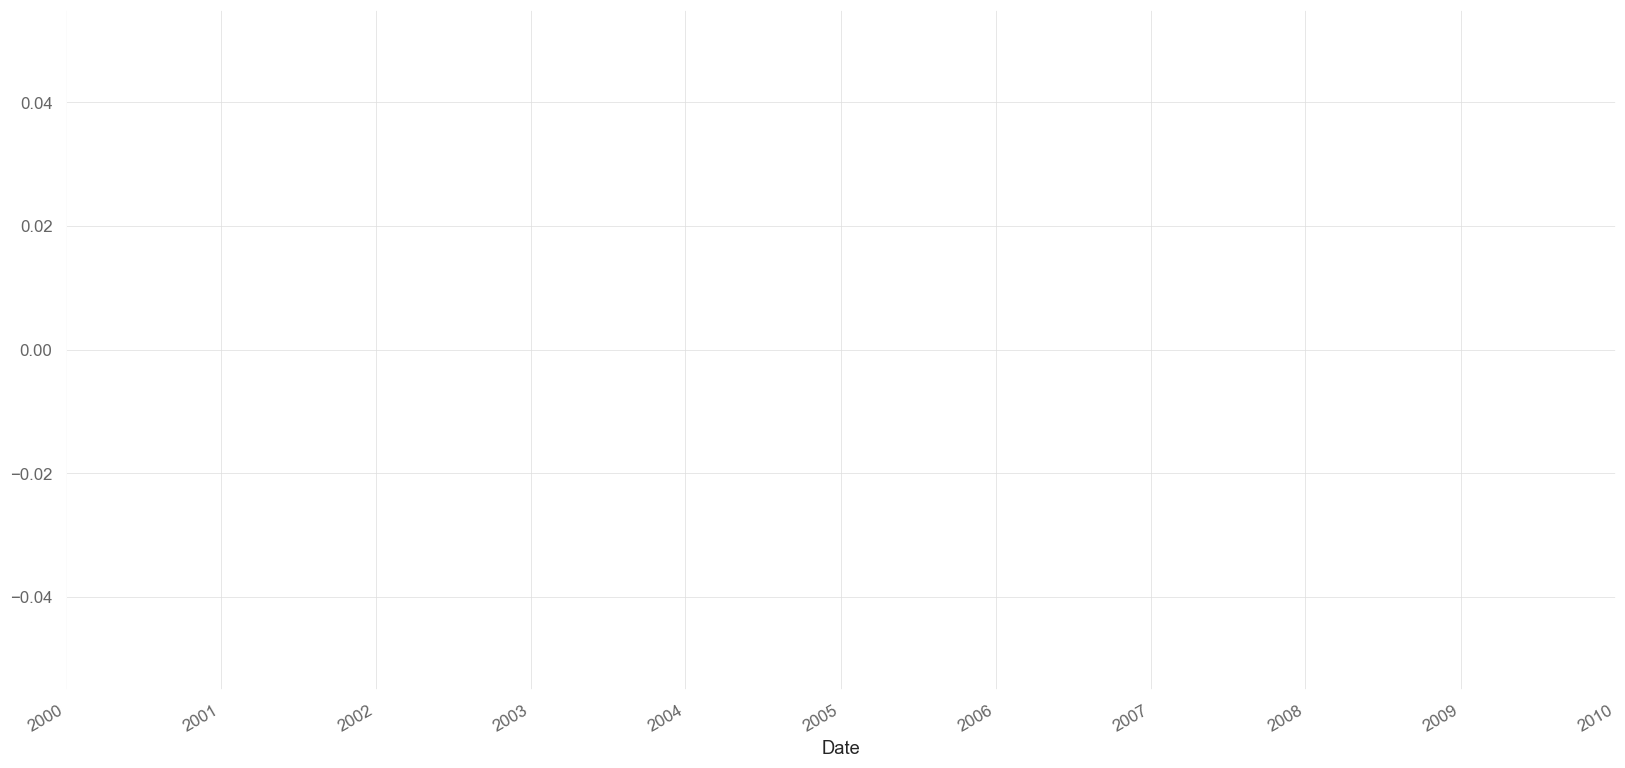

In [153]:
Percentages=DataSet[validIntersection].pct_change()
Index=Percentages.mean(axis=1)
np.cumprod(1+Index).plot()

In [ ]:
#make a dictionary where the key is the name of the sector and the value is a pandas series of an ETF of that sector
#Write a code segment to plot with labels the sector name and its ETF in a chart